In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import seaborn as sns

#import sklearn to use linear regression algorithm to build model
from sklearn.linear_model import LinearRegression

#import sklearn to use decision tree regression algorithm to build model
from sklearn.tree import DecisionTreeRegressor

#Import Random Forest
from sklearn.ensemble import RandomForestRegressor

#Import Support Vector Machine
from sklearn import svm

#Import KNN
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

#Import ANN
from sklearn.neural_network import MLPRegressor

#Import Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

#import sklearn to split dataset into train/test datasets
from sklearn.model_selection import train_test_split

#import sklearn to perform k-fold cross validation and evaluation of model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

from matplotlib.offsetbox import AnchoredText

import pickle

## Model Type

In [2]:
model_type = 'MLR'

model_formula = LinearRegression()
# model_formula = KNeighborsRegressor(n_neighbors=4)
# model_formula = RandomForestRegressor(n_estimators = 50, random_state = 42, criterion = 'mse', min_samples_split = 10, max_features = 8)
# model_formula = GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=200, min_samples_split=2, alpha=0.9)
# model_formula = MLPRegressor(activation='tanh', solver='adam', alpha=0.0001, learning_rate_init=0.001, max_iter=400)

## Threshold Ranges

In [3]:
# Ratio Range
start = 0.83
end = 0.9
increment = 0.02

# Particle Size Range
start_ = 0.6
end_ = 1.2
increment_ = 0.2

In [4]:
color='C0'
color_nd='C1'
title_size = 14
label_size = 12
suptitle_size = 16

## Load & Filter Data

In [5]:
computer = r'C:\Users\SHICKEY\OneDrive - Dallas Independent School District\UNT\Calibration_Sensors_05262021\Calibration_Sensors\Collocation_Data\test_data'
training = 'Set 1'
val = 'Set 2'
test = 'Set 3'
test2 = 'Set 4'

file = r'{}\sensor_tceq.csv'.format(computer)
df = pd.read_csv(file)
df = df[df['tceq_pm25']>=0]
df = df[(df['pm2_5_atm_avg'] < df['pm10_0_atm_avg'])] #filter out abnormal values
df = df[(df['pm1_0_atm_avg'] < (df['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df['p03_p05'] = df['p_0_3_um_avg'] / df['p_0_5_um_avg']
df = df[(df['p03_p05'] < 3.75)] #filter out abnormal values


val_file = r'{}\sensor_tceq_new_set2.csv'.format(computer)
df_val = pd.read_csv(val_file)
df_val = df_val[df_val['tceq_pm25']>=0]
df_val = df_val[(df_val['pm2_5_atm_avg'] < df_val['pm10_0_atm_avg'])] #filter out abnormal values
df_val = df_val[(df_val['pm1_0_atm_avg'] < (df_val['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df_val['p03_p05'] = df_val['p_0_3_um_avg'] / df_val['p_0_5_um_avg']
df_val = df_val[(df_val['p03_p05'] < 3.75)] #filter out abnormal values
df_val


test_file = r'{}\sensor_tceq_new_set3.csv'.format(computer)
df_test = pd.read_csv(test_file)
df_test = df_test[df_test['tceq_pm25']>=0]
df_test = df_test[(df_test['pm2_5_atm_avg'] < df_test['pm10_0_atm_avg'])] #filter out abnormal values
df_test = df_test[(df_test['pm1_0_atm_avg'] < (df_test['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df_test['p03_p05'] = df_test['p_0_3_um_avg'] / df_test['p_0_5_um_avg']
df_test = df_test[(df_test['p03_p05'] < 3.75)] #filter out abnormal values
df_test

test2_file = r'{}\sensor_tceq_new_set4.csv'.format(computer)
df_test2 = pd.read_csv(test2_file)
df_test2 = df_test2[df_test2['tceq_pm25']>=0]
df_test2 = df_test2[(df_test2['pm2_5_atm_avg'] < df_test2['pm10_0_atm_avg'])] #filter out abnormal values
df_test2 = df_test2[(df_test2['pm1_0_atm_avg'] < (df_test2['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df_test2['p03_p05'] = df_test2['p_0_3_um_avg'] / df_test2['p_0_5_um_avg']
df_test2 = df_test2[(df_test2['p03_p05'] < 3.75)] #filter out abnormal values
print('Set 1', df.shape)
print('Set 2', df_val.shape)
print('Set 3', df_test.shape)
print('Set 4', df_test2.shape)

Set 1 (2739, 17)
Set 2 (2680, 17)
Set 3 (2670, 17)
Set 4 (2452, 17)


## Validation (Set 2)

Particle Size: [0.6, 0.6, 0.6, 0.6, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0]
Ratios: [0.83, 0.85, 0.87, 0.89, 0.83, 0.85, 0.87, 0.89, 0.83, 0.85, 0.87, 0.89]
Dust Hours: [1101, 1115, 1148, 1191, 841, 861, 909, 965, 711, 737, 797, 870]
Non-Dust Hours: [1638, 1624, 1591, 1548, 1898, 1878, 1830, 1774, 2028, 2002, 1942, 1869]
Dust NRMSE: [0.29, 0.3, 0.31, 0.34, 0.27, 0.28, 0.3, 0.32, 0.29, 0.31, 0.28, 0.4]
Non-Dust NRMSE: [0.39, 0.39, 0.39, 0.39, 0.4, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.38]
Mean NRMSE: [0.34, 0.34, 0.35, 0.36, 0.34, 0.34, 0.34, 0.36, 0.34, 0.35, 0.34, 0.39]
Dust RMSE: [4.52, 4.52, 4.52, 4.84, 4.28, 4.28, 4.35, 4.49, 4.54, 4.67, 4.03, 5.44]
Non-Dust RMSE: [2.87, 2.89, 2.9, 2.91, 3.1, 3.08, 3.09, 3.08, 3.17, 3.15, 3.16, 3.1]
Mean RMSE: [3.7, 3.7, 3.71, 3.88, 3.69, 3.68, 3.72, 3.78, 3.86, 3.91, 3.6, 4.27]
Dust R2: [0.81, 0.81, 0.81, 0.78, 0.85, 0.85, 0.84, 0.83, 0.85, 0.84, 0.87, 0.75]
Non-Dust R2: [0.45, 0.44, 0.44, 0.43, 0.47, 0.48, 0.46, 0.46, 0.53, 0.53, 0.51, 0.52]
Mean

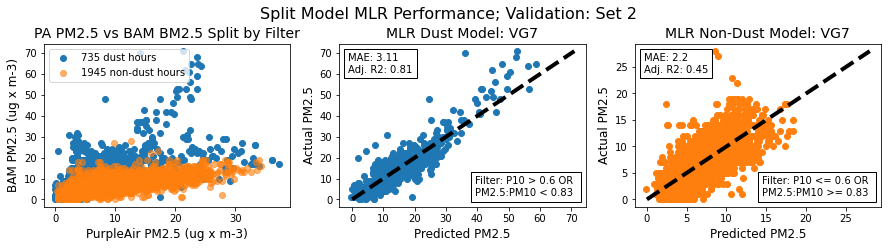

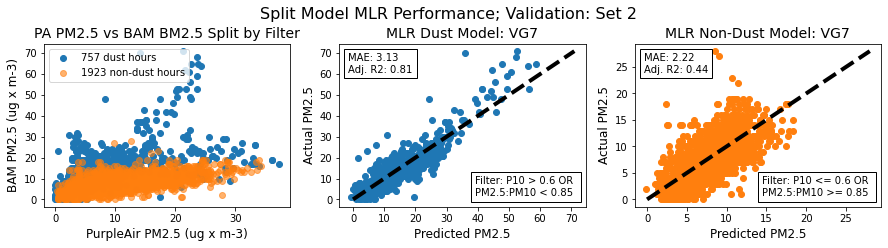

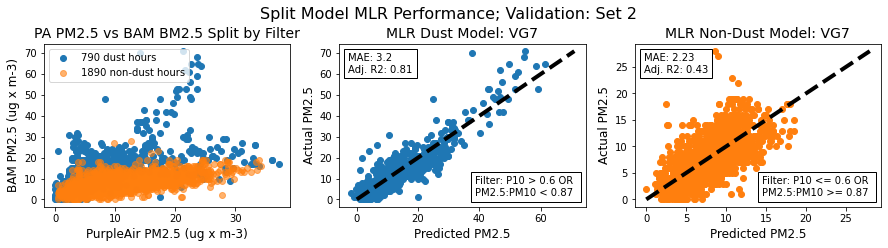

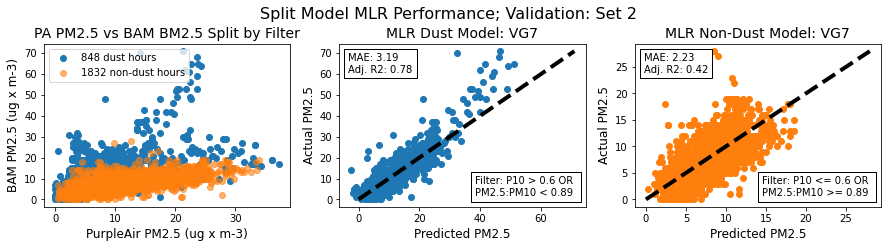

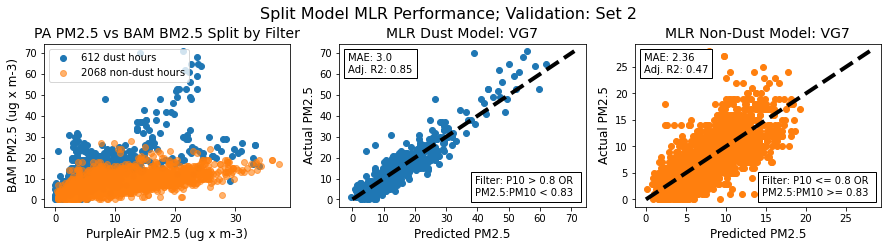

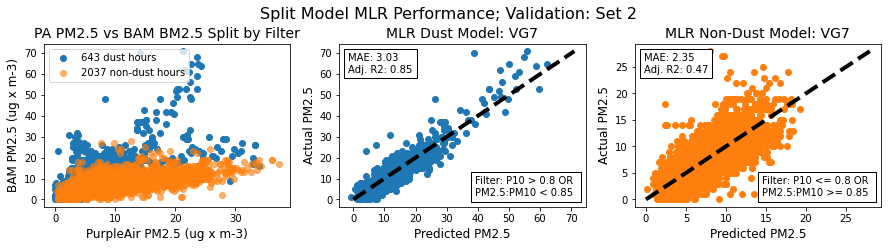

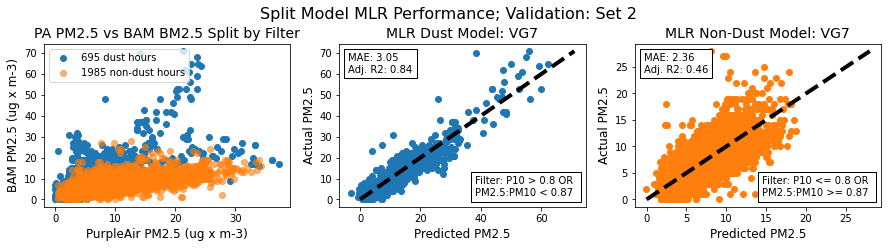

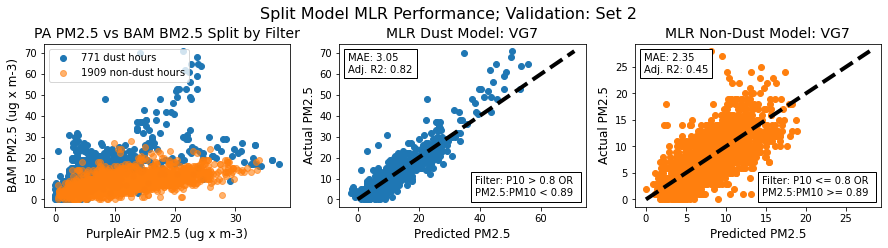

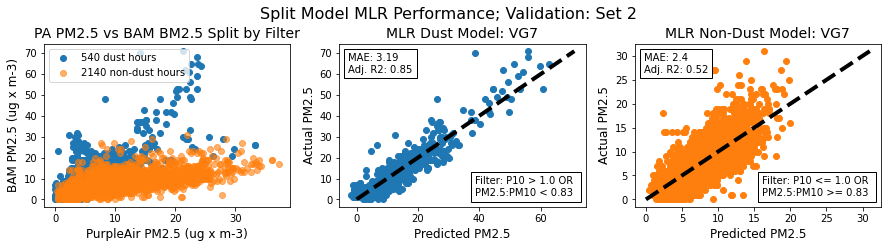

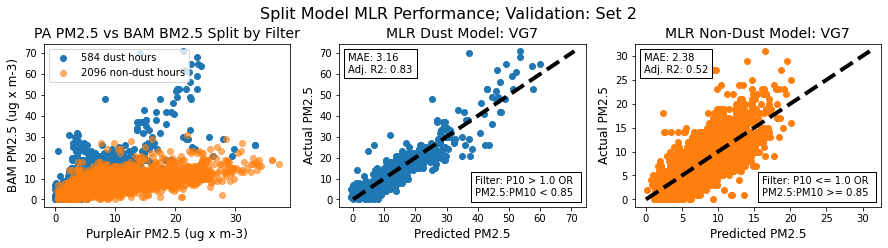

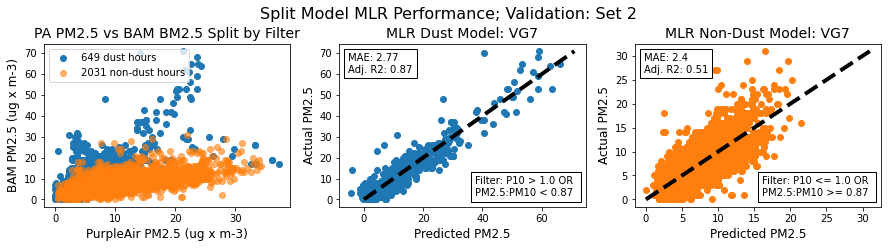

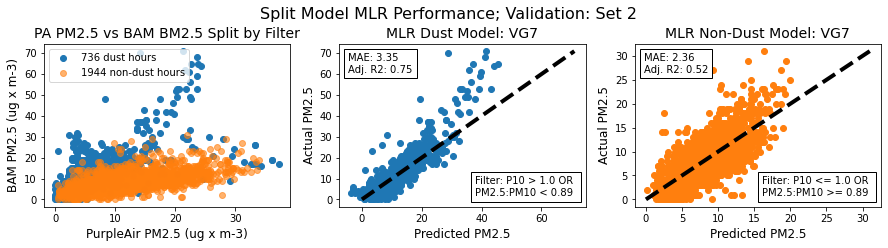

In [6]:
%%time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

################################## Edit each time change is made #####################################
particle_size_val = []
keys_ratio_val = []
dust_nrmse_ratio_val = []
nodust_nrmse_ratio_val = []
nrmse_mean_ratio_val = []
dust_rmse_ratio_val = []
nodust_rmse_ratio_val = []
rmse_mean_ratio_val = []
dust_hours_ratio_val = []
nodust_hours_ratio_val = []
r2_mean_val = []
dust_r2_val = []
nodust_r2_val = []
dust_mae_val = []
nodust_mae_val = []
mean_mae_val = []
dust_nmae_val = []
nodust_nmae_val = []
mean_nmae_val = []

################################## PA-PM2.5 Treshold ###########################################
# pm25 = 
for p_size in np.arange(start_,end_,increment_):
    for threshold in np.arange(start,end,increment):
#################################### Dust Filters #############################################
        df_dust = df[(df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold)]
        df_nodust = df[~((df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold))]

        df_dust_val = df_val[(df_val['p_10_0_um_avg'] > p_size) | (df_val['pm25_pm10'] < threshold)]
        df_nodust_val = df_val[~((df_val['p_10_0_um_avg'] > p_size) | (df_val['pm25_pm10'] < threshold))]

    ################################### Slice Datasets ##########################################################
    #################################### Training Set ##############################################################
        VG7 = df_dust[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y = df_dust['tceq_pm25']

        VG7_nd = df_nodust[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y_nd = df_nodust['tceq_pm25']

    #################################### Validation Set ##############################################################
        VG7_val = df_dust_val[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y_val = df_dust_val['tceq_pm25']

        VG7_nd_val = df_nodust_val[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y_nd_val = df_nodust_val['tceq_pm25']

    ############################### Train & Save Models #################################################

        trained_model = model_formula.fit(VG7, Y)
        trained_model_nd = model_formula.fit(VG7_nd, Y_nd)

        # Save to file in the current working directory
        pkl_filename = r'{}\trained_model.pkl'.format(computer)
        with open(pkl_filename, 'wb') as file:
            pickle.dump(trained_model, file)

        # Save to file in the current working directory
        pkl_filename_nd = r'{}\trained_model_nd.pkl'.format(computer)
        with open(pkl_filename_nd, 'wb') as file:
            pickle.dump(trained_model_nd, file)

    ############################# Make Figure ###########################################
        fig = plt.figure(figsize=(15,3))
        ax = fig.add_subplot(132)
        ax2 = fig.add_subplot(133)
        ax3 = fig.add_subplot(131)
        fig.suptitle('Split Model ' + model_type + ' Performance; Validation: ' + val, y=1.05, size=suptitle_size)

        #Plot 131
        ax3.scatter(df_dust_val['pm2_5_atm_avg'], df_dust_val['tceq_pm25'], label = str(df_dust_val.shape[0])+' dust hours', c=color)
        ax3.scatter(df_nodust_val['pm2_5_atm_avg'], df_nodust_val['tceq_pm25'], label = str(df_nodust_val.shape[0])+' non-dust hours', alpha=0.6, c=color_nd)
        ax3.set_ylabel('BAM PM2.5 (ug x m-3)', size=label_size)
        ax3.set_xlabel('PurpleAir PM2.5 (ug x m-3)', size=label_size)
        ax3.set_title("PA PM2.5 vs BAM BM2.5 Split by Filter", size=title_size)#(str(model_type) + ' Split-Model: VG7')
        ax3.legend(loc=2)     

    ###################################### Dust #############################################
        # Load from file
        with open(pkl_filename, 'rb') as file:
            pickle_model = pickle.load(file)

        #Metrics
        predicted = cross_val_predict(pickle_model, VG7_val, Y_val)
        squared_error = (predicted - Y_val)**2
        sum_squared_error = sum(squared_error)
        predicted_mean = predicted.mean()
        squared_total = (Y_val - predicted_mean)**2
        sum_squared_total = sum(squared_total)
        sum_squared_total
        n = Y_val.shape[0]
        k = VG7_val.shape[1]

        #Score
        rmse = np.sqrt(sum_squared_error/n)
        RMSE = round(rmse,2)
        Y_mean = Y_val.mean()
        NRMSE = round(RMSE/Y_mean,2)
        r2 = 1 - (sum_squared_error/sum_squared_total)
        R2 = round(r2,2)
        ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
        AR2 = round(ar2,2) 
        MAE = round(sum(abs(predicted - Y_val))/n,2)
        nMAE = round((sum(abs(predicted - Y_val)))/n/Y_mean,2)


        #Plot 132
        ax.scatter(predicted, Y_val, c=color)
        ax.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'k--', lw=4)
        ax.set_xlabel('Predicted PM2.5', size=label_size)
        ax.set_ylabel('Actual PM2.5', size=label_size)
        ax.set_title(str(model_type) + ' Dust Model: VG7',size=title_size)
        anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n'
                                     'Adj. R2: ' + str(AR2), loc=2)
        ax.add_artist(anchored_text)
        anchored_text2 = AnchoredText('Filter: P10 > ' + str(round(p_size,2)) + 
          ' OR ' + '\n' + 'PM2.5:PM10 < '+ str(round(threshold,2)), loc=4)
        ax.add_artist(anchored_text2)

    ##################################### No Dust ####################################
        # Load from file
        with open(pkl_filename_nd, 'rb') as file:
            pickle_model_nd = pickle.load(file)


        #Metrics
        predicted_nd = cross_val_predict(pickle_model_nd, VG7_nd_val, Y_nd_val)
        squared_error_nd = (predicted_nd - Y_nd_val)**2
        sum_squared_error_nd = sum(squared_error_nd)
        predicted_mean_nd = predicted_nd.mean()
        squared_total_nd = (Y_nd_val - predicted_mean_nd)**2
        sum_squared_total_nd = sum(squared_total_nd)
        n_nd = Y_nd_val.shape[0]
        k_nd = VG7_nd_val.shape[1]

        #Score
        rmse_nd = np.sqrt(sum_squared_error_nd/n_nd)
        RMSE_nd = round(rmse_nd,2)
        Y_mean_nd = Y_nd_val.mean()
        NRMSE_nd = round(RMSE_nd/Y_mean_nd,2)
        r2_nd = 1 - (sum_squared_error_nd/sum_squared_total_nd)
        R2_nd = round(r2_nd,2)
        ar2_nd = 1-(((1-r2_nd)*(n_nd-1))/(n_nd-k_nd-1))
        AR2_nd = round(ar2_nd,2)
        MAE_nd = round(sum(abs(predicted_nd - Y_nd_val))/n_nd,2)
        nMAE_nd = round((sum(abs(predicted_nd - Y_nd_val)))/n_nd/Y_mean_nd,2)


        #Plot 133
        ax2.scatter(predicted_nd, Y_nd_val, c=color_nd)# edgecolors=(0, 0, 0))
        ax2.plot([Y_nd_val.min(), Y_nd_val.max()], [Y_nd_val.min(), Y_nd_val.max()], 'k--', lw=4)
        ax2.set_xlabel('Predicted PM2.5', size=label_size)
        ax2.set_ylabel('Actual PM2.5', size = label_size)
        ax2.set_title(str(model_type) + ' Non-Dust Model: VG7', size=title_size)
        anchored_text = AnchoredText('MAE: ' + str(MAE_nd) + '\n'
                                     'Adj. R2: ' + str(AR2_nd), loc=2)
        ax2.add_artist(anchored_text)
        anchored_text2 = AnchoredText('Filter: P10 <= ' + str(round(p_size,2)) + 
                  ' OR ' + '\n' + 'PM2.5:PM10 >= '+ str(round(threshold,2)), loc=4)
        ax2.add_artist(anchored_text2)

    ################################## Edit each time change is made ###########################################
        particle_size_val.append(round(p_size,2))
        keys_ratio_val.append(round(threshold,2))
        dust_hours_ratio_val.append(df_dust.shape[0])
        nodust_hours_ratio_val.append(df_nodust.shape[0])

        dust_nrmse_ratio_val.append(NRMSE)
        nodust_nrmse_ratio_val.append(NRMSE_nd)
        nrmse_mean_ratio_val.append(round((NRMSE+NRMSE_nd)/2,2))

        dust_rmse_ratio_val.append(RMSE)
        nodust_rmse_ratio_val.append(RMSE_nd)
        rmse_mean_ratio_val.append(round((RMSE+RMSE_nd)/2,2))
        
        dust_r2_val.append(R2)
        nodust_r2_val.append(R2_nd)
        r2_mean_val.append(round((R2+R2_nd)/2,2))
        
        dust_nmae_val.append(nMAE)
        nodust_nmae_val.append(nMAE_nd)
        mean_nmae_val.append(round((nMAE+nMAE_nd)/2,2))

        dust_mae_val.append(MAE)
        nodust_mae_val.append(MAE_nd)
        mean_mae_val.append(round((MAE+MAE_nd)/2,2))

    ################################## Edit each time change is made ###########################################
print('Particle Size:', particle_size_val)
print('Ratios:', keys_ratio_val)
print('Dust Hours:', dust_hours_ratio_val)
print('Non-Dust Hours:', nodust_hours_ratio_val)

print('Dust NRMSE:', dust_nrmse_ratio_val)
print('Non-Dust NRMSE:', nodust_nrmse_ratio_val)
print('Mean NRMSE:', nrmse_mean_ratio_val)

print('Dust RMSE:', dust_rmse_ratio_val)
print('Non-Dust RMSE:', nodust_rmse_ratio_val)
print('Mean RMSE:', rmse_mean_ratio_val)

print('Dust R2:', dust_r2_val)
print('Non-Dust R2:', nodust_r2_val)
print('Mean R2:', nodust_r2_val)

print('Dust NRMSE:', dust_mae_val)
print('Non-Dust NRMSE:', nodust_mae_val)
print('Mean NRMSE:', mean_mae_val)

print('Dust NRMSE:', dust_nmae_val)
print('Non-Dust NRMSE:', nodust_nmae_val)
print('Mean NRMSE:', mean_nmae_val)
    ################################## Edit each time change is made ###########################################

### Visualize Model Performance as Influenced By PM2.5:PM10 Ratio

In [7]:
dfval = pd.DataFrame(
    {'Particle Size': particle_size_val,
    'Ratios':  keys_ratio_val,
    'Dust Hours': dust_hours_ratio_val,
    'Non-Dust Hours':nodust_hours_ratio_val,

    'Dust NRMSE': dust_nrmse_ratio_val,
    'Non-Dust NRMSE': nodust_nrmse_ratio_val,
    'Mean NRMSE': nrmse_mean_ratio_val,

    'Dust RMSE': dust_rmse_ratio_val,
    'Non-Dust RMSE': nodust_rmse_ratio_val,
    'Mean RMSE': rmse_mean_ratio_val,
     
    'Dust R2': dust_r2_val,
    'Non-Dust R2': nodust_r2_val,
    'Mean R2': r2_mean_val
     
    })

df_meanrmse_val = dfval[['Ratios', 'Particle Size', 'Mean RMSE']]
df_meanr2_val = dfval[['Ratios', 'Particle Size', 'Mean R2']]

mean_array_val = df_meanrmse_val.to_numpy()
meanr2_array_val = df_meanr2_val.to_numpy()


In [8]:
dfval.sort_values(by=['Mean RMSE'], ascending=True).head(20)

,Particle Size,Ratios,Dust Hours,Non-Dust Hours,Dust NRMSE,Non-Dust NRMSE,Mean NRMSE,Dust RMSE,Non-Dust RMSE,Mean RMSE,Dust R2,Non-Dust R2,Mean R2
10,1.0,0.87,797,1942,0.28,0.39,0.34,4.03,3.16,3.60,0.87,0.51,0.69
5,0.8,0.85,861,1878,0.28,0.39,0.34,4.28,3.08,3.68,0.85,0.48,0.67
4,0.8,0.83,841,1898,0.27,0.40,0.34,4.28,3.10,3.69,0.85,0.47,0.66
0,0.6,0.83,1101,1638,0.29,0.39,0.34,4.52,2.87,3.70,0.81,0.45,0.63
1,0.6,0.85,1115,1624,0.30,0.39,0.34,4.52,2.89,3.70,0.81,0.44,0.62
2,0.6,0.87,1148,1591,0.31,0.39,0.35,4.52,2.90,3.71,0.81,0.44,0.62
6,0.8,0.87,909,1830,0.30,0.39,0.34,4.35,3.09,3.72,0.84,0.46,0.65
7,0.8,0.89,965,1774,0.32,0.39,0.36,4.49,3.08,3.78,0.83,0.46,0.65
8,1.0,0.83,711,2028,0.29,0.39,0.34,4.54,3.17,3.86,0.85,0.53,0.69
3,0.6,0.89,1191,1548,0.34,0.39,0.36,4.84,2.91,3.88,0.78,0.43,0.60


In [9]:
dfval.sort_values(by=['Mean R2'], ascending=False).head(20)

,Particle Size,Ratios,Dust Hours,Non-Dust Hours,Dust NRMSE,Non-Dust NRMSE,Mean NRMSE,Dust RMSE,Non-Dust RMSE,Mean RMSE,Dust R2,Non-Dust R2,Mean R2
8,1.0,0.83,711,2028,0.29,0.39,0.34,4.54,3.17,3.86,0.85,0.53,0.69
9,1.0,0.85,737,2002,0.31,0.39,0.35,4.67,3.15,3.91,0.84,0.53,0.69
10,1.0,0.87,797,1942,0.28,0.39,0.34,4.03,3.16,3.60,0.87,0.51,0.69
5,0.8,0.85,861,1878,0.28,0.39,0.34,4.28,3.08,3.68,0.85,0.48,0.67
4,0.8,0.83,841,1898,0.27,0.40,0.34,4.28,3.10,3.69,0.85,0.47,0.66
6,0.8,0.87,909,1830,0.30,0.39,0.34,4.35,3.09,3.72,0.84,0.46,0.65
7,0.8,0.89,965,1774,0.32,0.39,0.36,4.49,3.08,3.78,0.83,0.46,0.65
11,1.0,0.89,870,1869,0.40,0.38,0.39,5.44,3.10,4.27,0.75,0.52,0.64
0,0.6,0.83,1101,1638,0.29,0.39,0.34,4.52,2.87,3.70,0.81,0.45,0.63
1,0.6,0.85,1115,1624,0.30,0.39,0.34,4.52,2.89,3.70,0.81,0.44,0.62


## R2 Val

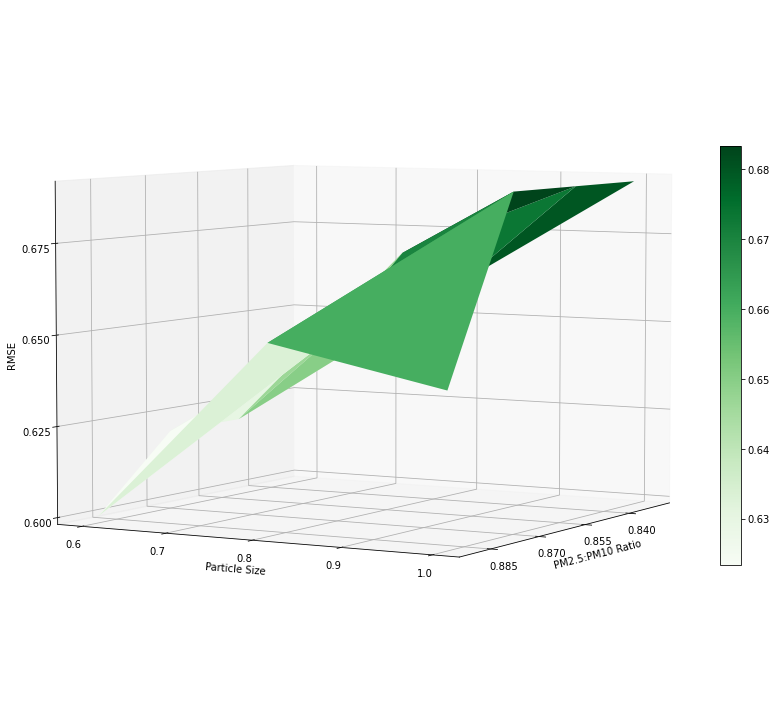

In [10]:
%matplotlib inline
# %matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np


Xs = meanr2_array_val[:,0]
Ys = meanr2_array_val[:,1]
Zs = meanr2_array_val[:,2]


# ======
## plot:

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.Greens, linewidth=0)
fig.colorbar(surf1, shrink=0.6, pad=0.01)


#Dust Axes
ax.xaxis.set_major_locator(MaxNLocator(6)) #Sets number of ticks on axis
ax.set_xlabel('PM2.5:PM10 Ratio')
ax.yaxis.set_major_locator(MaxNLocator(5))  #Sets number of ticks on axis
ax.set_ylabel('Particle Size')
ax.zaxis.set_major_locator(MaxNLocator(4))  #Sets number of ticks on axis
ax.set_zlabel('RMSE', rotation=90)

ax.text(0.96, 6, 6, "Dust Models", color='black', fontsize=12,fontweight=500)

ax.view_init(5, 30) # controls orientation of 3D plot
fig.tight_layout()
fig.show() # or:
# fig.savefig('3D.png')

## RMSE Val

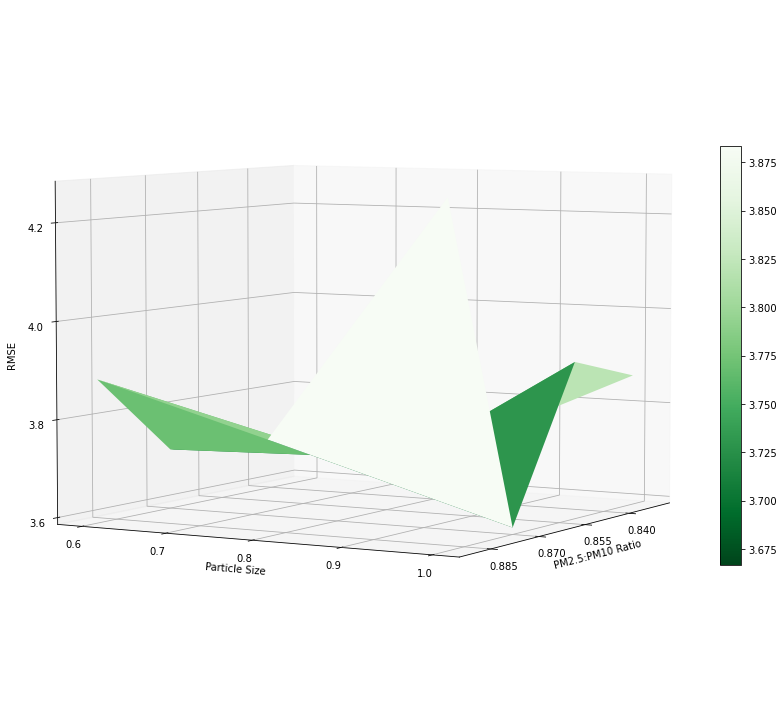

In [11]:
%matplotlib inline
# %matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

Xs = mean_array_val[:,0]
Ys = mean_array_val[:,1]
Zs = mean_array_val[:,2]


# ======
## plot:

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.Greens_r, linewidth=0)
fig.colorbar(surf1, shrink=0.6, pad=0.01)


#Dust Axes
ax.xaxis.set_major_locator(MaxNLocator(6)) #Sets number of ticks on axis
ax.set_xlabel('PM2.5:PM10 Ratio')
ax.yaxis.set_major_locator(MaxNLocator(5))  #Sets number of ticks on axis
ax.set_ylabel('Particle Size')
ax.zaxis.set_major_locator(MaxNLocator(4))  #Sets number of ticks on axis
ax.set_zlabel('RMSE', rotation=90)

ax.text(0.96, 6, 6, "Dust Models", color='black', fontsize=12,fontweight=500)


ax.view_init(5, 30) # controls orientation of 3D plot
fig.tight_layout()
fig.show() # or:
# fig.savefig('3D.png')

## Test (Set 3)

Particle Size: [0.6, 0.6, 0.6, 0.6, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0]
Ratios: [0.83, 0.85, 0.87, 0.89, 0.83, 0.85, 0.87, 0.89, 0.83, 0.85, 0.87, 0.89]
Dust Hours: [1101, 1115, 1148, 1191, 841, 861, 909, 965, 711, 737, 797, 870]
Non-Dust Hours: [1638, 1624, 1591, 1548, 1898, 1878, 1830, 1774, 2028, 2002, 1942, 1869]
Dust NRMSE: [0.31, 0.32, 0.32, 0.33, 0.38, 0.33, 0.32, 0.34, 0.3, 0.31, 0.39, 0.42]
Non-Dust NRMSE: [0.31, 0.32, 0.32, 0.33, 0.38, 0.33, 0.32, 0.34, 0.3, 0.31, 0.39, 0.42]
Mean NRMSE: [0.31, 0.32, 0.32, 0.33, 0.38, 0.33, 0.32, 0.34, 0.3, 0.31, 0.39, 0.42]
Dust RMSE: [4.47, 4.4, 4.31, 4.29, 5.56, 4.69, 4.35, 4.4, 4.45, 4.47, 5.34, 5.46]
Non-Dust RMSE: [2.78, 2.78, 2.78, 2.79, 2.91, 2.91, 2.87, 2.9, 3.14, 3.12, 3.1, 3.11]
Mean RMSE: [3.62, 3.59, 3.54, 3.54, 4.23, 3.8, 3.61, 3.65, 3.8, 3.8, 4.22, 4.28]
Dust R2: [0.81, 0.82, 0.82, 0.82, 0.74, 0.81, 0.83, 0.82, 0.84, 0.84, 0.76, 0.74]
Non-Dust R2: [0.48, 0.48, 0.47, 0.46, 0.46, 0.45, 0.45, 0.43, 0.42, 0.42, 0.41, 0.39]
Mean

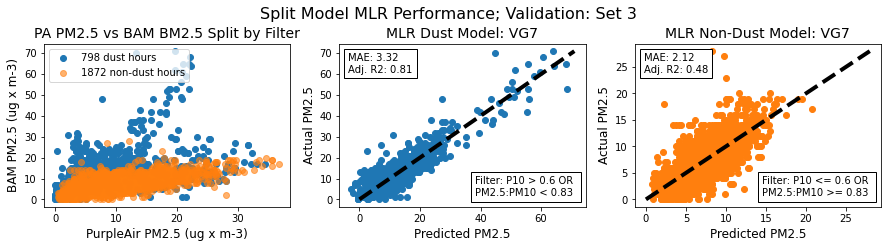

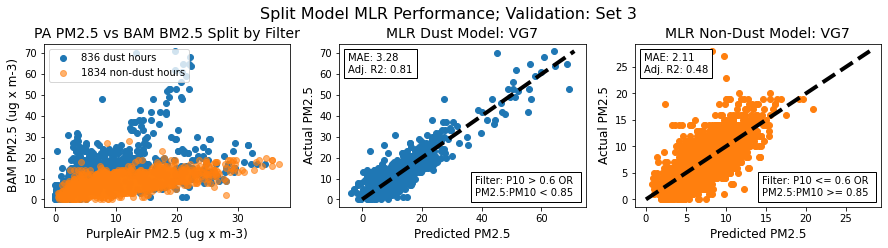

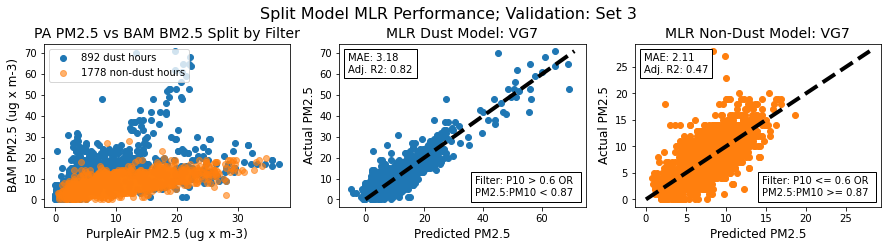

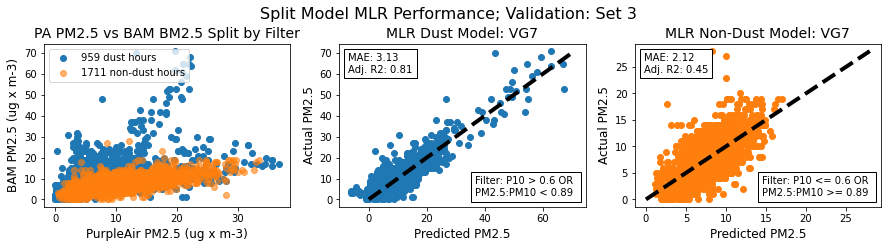

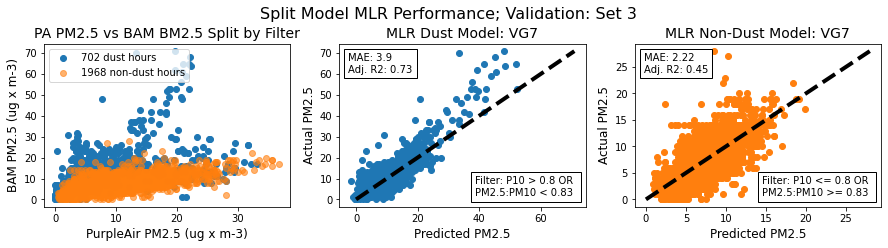

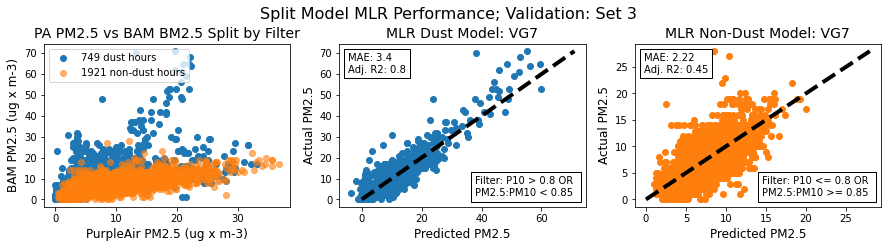

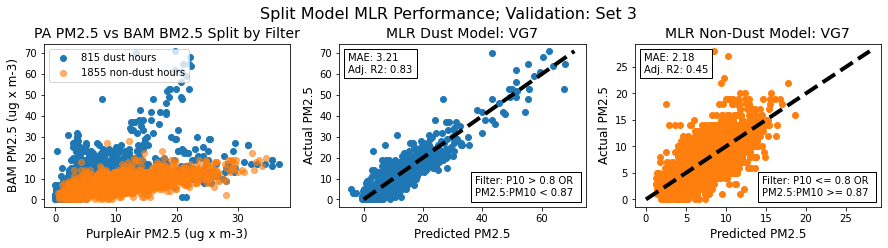

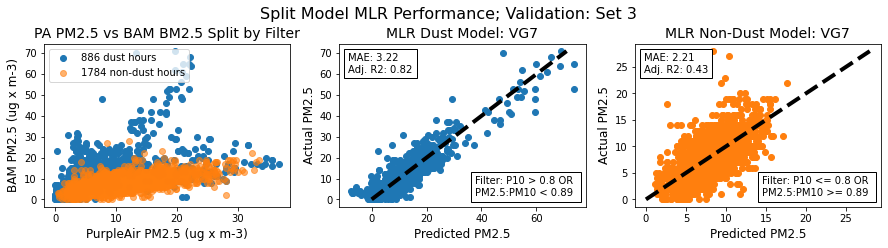

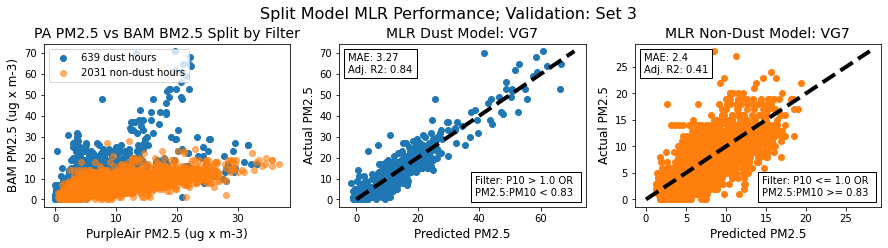

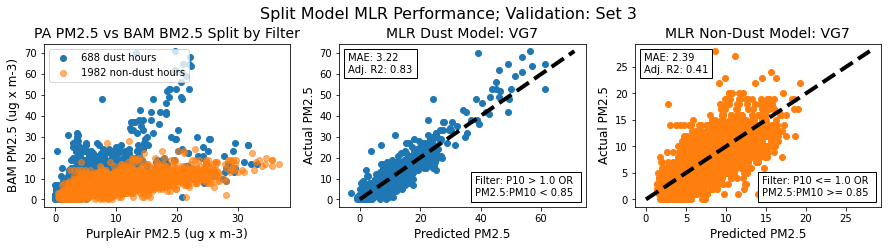

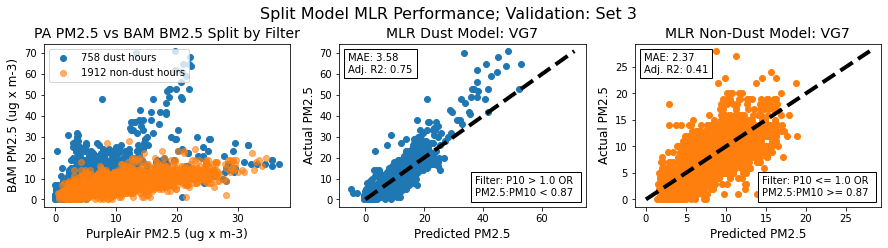

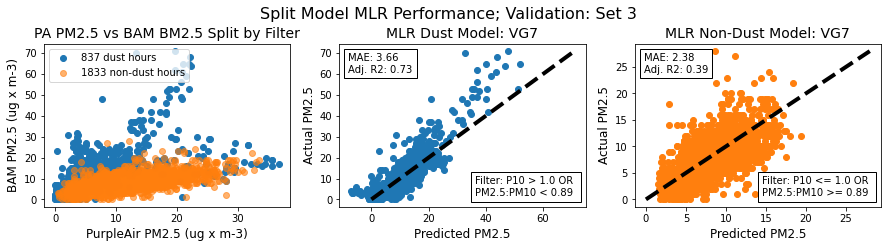

In [12]:
%%time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

################################## Edit each time change is made #####################################
particle_size_test = []
keys_ratio_test = []
dust_nrmse_ratio_test = []
nodust_nrmse_ratio_test = []
nrmse_mean_ratio_test = []
dust_rmse_ratio_test = []
nodust_rmse_ratio_test = []
rmse_mean_ratio_test = []
dust_hours_ratio_test= []
nodust_hours_ratio_test = []
r2_mean_test = []
dust_r2_test = []
nodust_r2_test = []
dust_mae_test = []
nodust_mae_test = []
mean_mae_test = []
dust_nmae_test = []
nodust_nmae_test = []
mean_nmae_test = []

################################## PA-PM2.5 Treshold ###########################################
# pm25 = 
for p_size in np.arange(start_,end_,increment_):
    for threshold in np.arange(start,end,increment):
#################################### Dust Filters #############################################

        df_dust = df[(df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold)]
        df_nodust = df[~((df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold))]

        df_dust_test = df_test[(df_test['p_10_0_um_avg'] > p_size) | (df_test['pm25_pm10'] < threshold)]
        df_nodust_test = df_test[~((df_test['p_10_0_um_avg'] > p_size) | (df_test['pm25_pm10'] < threshold))]

    ################################### Slice Datasets ##########################################################
    #################################### Training Set ##############################################################
        VG7 = df_dust[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y = df_dust['tceq_pm25']

        VG7_nd = df_nodust[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y_nd = df_nodust['tceq_pm25']

    #################################### Validation Set ##############################################################
        VG7_test = df_dust_test[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y_test = df_dust_test['tceq_pm25']

        VG7_nd_test = df_nodust_test[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y_nd_test = df_nodust_test['tceq_pm25']

    ############################### Train & Save Models #################################################
        trained_model = model_formula.fit(VG7, Y)
        # Save to file in the current working directory
        pkl_filename = r'{}\trained_model.pkl'.format(computer)
        with open(pkl_filename, 'wb') as file:
            pickle.dump(trained_model, file)

        trained_model_nd = model_formula.fit(VG7_nd, Y_nd)
        # Save to file in the current working directory
        pkl_filename_nd = r'{}\trained_model_nd.pkl'.format(computer)
        with open(pkl_filename_nd, 'wb') as file:
            pickle.dump(trained_model_nd, file)

    ############################# Make Figure ###########################################
        fig = plt.figure(figsize=(15,3))
        ax = fig.add_subplot(132)
        ax2 = fig.add_subplot(133)
        ax3 = fig.add_subplot(131)
        fig.suptitle('Split Model ' + model_type + ' Performance; Validation: ' + test, y=1.05, size=suptitle_size)

        #Plot 131
        ax3.scatter(df_dust_test['pm2_5_atm_avg'], df_dust_test['tceq_pm25'], label = str(df_dust_test.shape[0])+' dust hours', c=color)
        ax3.scatter(df_nodust_test['pm2_5_atm_avg'], df_nodust_test['tceq_pm25'], label = str(df_nodust_test.shape[0])+' non-dust hours', alpha=0.6, c=color_nd)
        ax3.set_ylabel('BAM PM2.5 (ug x m-3)', size=label_size)
        ax3.set_xlabel('PurpleAir PM2.5 (ug x m-3)', size=label_size)
        ax3.set_title("PA PM2.5 vs BAM BM2.5 Split by Filter", size=title_size)#(str(model_type) + ' Split-Model: VG7')
        ax3.legend(loc=2)    

    ###################################### Dust #############################################
        # Load from file
        with open(pkl_filename, 'rb') as file:
            pickle_model = pickle.load(file)

        #Metrics
        predicted = cross_val_predict(pickle_model, VG7_test, Y_test)
        squared_error = (predicted - Y_test)**2
        sum_squared_error = sum(squared_error)
        predicted_mean = predicted.mean()
        squared_total = (Y_test - predicted_mean)**2
        sum_squared_total = sum(squared_total)
        sum_squared_total
        n = Y_test.shape[0]
        k = VG7_test.shape[1]

        #Score
        rmse = np.sqrt(sum_squared_error/n)
        RMSE = round(rmse,2)
        Y_mean = Y_test.mean()
        NRMSE = round(RMSE/Y_mean,2)
        r2 = 1 - (sum_squared_error/sum_squared_total)
        R2 = round(r2,2)
        ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
        AR2 = round(ar2,2) 
        MAE = round(sum(abs(predicted - Y_test))/n,2)
        nMAE = round((sum(abs(predicted - Y_test)))/n/Y_mean,2)

        #Plot 132
        ax.scatter(predicted, Y_test, c=color)
        ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
        ax.set_xlabel('Predicted PM2.5', size=label_size)
        ax.set_ylabel('Actual PM2.5', size=label_size)
        ax.set_title(str(model_type) + ' Dust Model: VG7',size=title_size)
        anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n'
                                     'Adj. R2: ' + str(AR2), loc=2)
        ax.add_artist(anchored_text)
        anchored_text2 = AnchoredText('Filter: P10 > ' + str(round(p_size,2)) + 
          ' OR ' + '\n' + 'PM2.5:PM10 < '+ str(round(threshold,2)), loc=4)
        ax.add_artist(anchored_text2)
    ##################################### No Dust ####################################
        # Load from file
        with open(pkl_filename_nd, 'rb') as file:
            pickle_model_nd = pickle.load(file)


        #Metrics
        predicted_nd = cross_val_predict(pickle_model_nd, VG7_nd_test, Y_nd_test)
        squared_error_nd = (predicted_nd - Y_nd_test)**2
        sum_squared_error_nd = sum(squared_error_nd)
        predicted_mean_nd = predicted_nd.mean()
        squared_total_nd = (Y_nd_test - predicted_mean_nd)**2
        sum_squared_total_nd = sum(squared_total_nd)
        n_nd = Y_nd_test.shape[0]
        k_nd = VG7_nd_test.shape[1]

        #Score
        rmse_nd = np.sqrt(sum_squared_error_nd/n_nd)
        RMSE_nd = round(rmse_nd,2)
        Y_mean_nd = Y_nd_test.mean()
        NRMSE_nd = round(RMSE/Y_mean,2)
        r2_nd = 1 - (sum_squared_error_nd/sum_squared_total_nd)
        R2_nd = round(r2_nd,2)
        ar2_nd = 1-(((1-r2_nd)*(n_nd-1))/(n_nd-k_nd-1))
        AR2_nd = round(ar2_nd,2)
        MAE_nd = round(sum(abs(predicted_nd - Y_nd_test))/n_nd,2)
        nMAE_nd = round((sum(abs(predicted_nd - Y_nd_test)))/n_nd/Y_mean_nd,2)

        #Plot 133
        ax2.scatter(predicted_nd, Y_nd_test, c=color_nd)# edgecolors=(0, 0, 0))
        ax2.plot([Y_nd_test.min(), Y_nd_test.max()], [Y_nd_test.min(), Y_nd_test.max()], 'k--', lw=4)
        ax2.set_xlabel('Predicted PM2.5', size=label_size)
        ax2.set_ylabel('Actual PM2.5', size = label_size)
        ax2.set_title(str(model_type) + ' Non-Dust Model: VG7', size=title_size)
        anchored_text = AnchoredText('MAE: ' + str(MAE_nd) + '\n'
                                     'Adj. R2: ' + str(AR2_nd), loc=2)
        ax2.add_artist(anchored_text)
        anchored_text2 = AnchoredText('Filter: P10 <= ' + str(round(p_size,2)) + 
                  ' OR ' + '\n' + 'PM2.5:PM10 >= '+ str(round(threshold,2)), loc=4)
        ax2.add_artist(anchored_text2)

    ################################## Edit each time change is made ###########################################
        particle_size_test.append(round(p_size,2))
        keys_ratio_test.append(round(threshold,2))
        dust_hours_ratio_test.append(df_dust.shape[0])
        nodust_hours_ratio_test.append(df_nodust.shape[0])

        dust_nrmse_ratio_test.append(NRMSE)
        nodust_nrmse_ratio_test.append(NRMSE_nd)
        nrmse_mean_ratio_test.append(round((NRMSE+NRMSE_nd)/2,2))

        dust_rmse_ratio_test.append(RMSE)
        nodust_rmse_ratio_test.append(RMSE_nd)
        rmse_mean_ratio_test.append(round((RMSE+RMSE_nd)/2,2))
        
        dust_r2_test.append(R2)
        nodust_r2_test.append(R2_nd)
        r2_mean_test.append(round((R2+R2_nd)/2,2))
        
        dust_nmae_test.append(nMAE)
        nodust_nmae_test.append(nMAE_nd)
        mean_nmae_test.append(round((nMAE+nMAE_nd)/2,2))

        dust_mae_test.append(MAE)
        nodust_mae_test.append(MAE_nd)
        mean_mae_test.append(round((MAE+MAE_nd)/2,2))

    ################################## Edit each time change is made ###########################################
print('Particle Size:', particle_size_test)
print('Ratios:', keys_ratio_test)
print('Dust Hours:', dust_hours_ratio_test)
print('Non-Dust Hours:', nodust_hours_ratio_test)

print('Dust NRMSE:', dust_nrmse_ratio_test)
print('Non-Dust NRMSE:', nodust_nrmse_ratio_test)
print('Mean NRMSE:', nrmse_mean_ratio_test)

print('Dust RMSE:', dust_rmse_ratio_test)
print('Non-Dust RMSE:', nodust_rmse_ratio_test)
print('Mean RMSE:', rmse_mean_ratio_test)

print('Dust R2:', dust_r2_test)
print('Non-Dust R2:', nodust_r2_test)
print('Mean R2:', r2_mean_test)

print('Dust NRMSE:', dust_mae_test)
print('Non-Dust NRMSE:', nodust_mae_test)
print('Mean NRMSE:', mean_mae_test)

print('Dust NRMSE:', dust_nmae_test)
print('Non-Dust NRMSE:', nodust_nmae_test)
print('Mean NRMSE:', mean_nmae_test)
    ################################## Edit each time change is made ###########################################

### Visualize Model Performance as Influenced By PM2.5:PM10 Ratio

# Test

In [13]:
dftest = pd.DataFrame(
    {'Particle Size': particle_size_test,
    'Ratios':  keys_ratio_test,
    'Dust Hours': dust_hours_ratio_test,
    'Non-Dust Hours':nodust_hours_ratio_test,

    'Dust NRMSE': dust_nrmse_ratio_test,
    'Non-Dust NRMSE': nodust_nrmse_ratio_test,
    'Mean NRMSE': nrmse_mean_ratio_test,

    'Dust RMSE': dust_rmse_ratio_test,
    'Non-Dust RMSE': nodust_rmse_ratio_test,
    'Mean RMSE': rmse_mean_ratio_test,
     
    'Dust R2': dust_r2_test,
    'Non-Dust R2': nodust_r2_test,
    'Mean R2': r2_mean_test
     
    })

df_meanrmse_test = dftest[['Ratios', 'Particle Size', 'Mean RMSE']]
df_meanr2_test = dftest[['Ratios', 'Particle Size', 'Mean R2']]


mean_array_test = df_meanrmse_test.to_numpy()
meanr2_array_test = df_meanr2_test.to_numpy()


In [14]:
dftest_Filter = dftest[dftest['Non-Dust Hours']>1200]
dftest.sort_values(by=['Mean RMSE'], ascending=True).head(20)

,Particle Size,Ratios,Dust Hours,Non-Dust Hours,Dust NRMSE,Non-Dust NRMSE,Mean NRMSE,Dust RMSE,Non-Dust RMSE,Mean RMSE,Dust R2,Non-Dust R2,Mean R2
2,0.6,0.87,1148,1591,0.32,0.32,0.32,4.31,2.78,3.54,0.82,0.47,0.65
3,0.6,0.89,1191,1548,0.33,0.33,0.33,4.29,2.79,3.54,0.82,0.46,0.64
1,0.6,0.85,1115,1624,0.32,0.32,0.32,4.40,2.78,3.59,0.82,0.48,0.65
6,0.8,0.87,909,1830,0.32,0.32,0.32,4.35,2.87,3.61,0.83,0.45,0.64
0,0.6,0.83,1101,1638,0.31,0.31,0.31,4.47,2.78,3.62,0.81,0.48,0.65
7,0.8,0.89,965,1774,0.34,0.34,0.34,4.40,2.90,3.65,0.82,0.43,0.62
5,0.8,0.85,861,1878,0.33,0.33,0.33,4.69,2.91,3.80,0.81,0.45,0.63
8,1.0,0.83,711,2028,0.30,0.30,0.30,4.45,3.14,3.80,0.84,0.42,0.63
9,1.0,0.85,737,2002,0.31,0.31,0.31,4.47,3.12,3.80,0.84,0.42,0.63
10,1.0,0.87,797,1942,0.39,0.39,0.39,5.34,3.10,4.22,0.76,0.41,0.58


In [15]:
dftest_Filter.sort_values(by=['Mean R2'], ascending=False).head(20)

,Particle Size,Ratios,Dust Hours,Non-Dust Hours,Dust NRMSE,Non-Dust NRMSE,Mean NRMSE,Dust RMSE,Non-Dust RMSE,Mean RMSE,Dust R2,Non-Dust R2,Mean R2
0,0.6,0.83,1101,1638,0.31,0.31,0.31,4.47,2.78,3.62,0.81,0.48,0.65
1,0.6,0.85,1115,1624,0.32,0.32,0.32,4.40,2.78,3.59,0.82,0.48,0.65
2,0.6,0.87,1148,1591,0.32,0.32,0.32,4.31,2.78,3.54,0.82,0.47,0.65
3,0.6,0.89,1191,1548,0.33,0.33,0.33,4.29,2.79,3.54,0.82,0.46,0.64
6,0.8,0.87,909,1830,0.32,0.32,0.32,4.35,2.87,3.61,0.83,0.45,0.64
5,0.8,0.85,861,1878,0.33,0.33,0.33,4.69,2.91,3.80,0.81,0.45,0.63
8,1.0,0.83,711,2028,0.30,0.30,0.30,4.45,3.14,3.80,0.84,0.42,0.63
9,1.0,0.85,737,2002,0.31,0.31,0.31,4.47,3.12,3.80,0.84,0.42,0.63
7,0.8,0.89,965,1774,0.34,0.34,0.34,4.40,2.90,3.65,0.82,0.43,0.62
4,0.8,0.83,841,1898,0.38,0.38,0.38,5.56,2.91,4.23,0.74,0.46,0.60


## R2 Test

In [16]:
%matplotlib 
# %matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

Xs = meanr2_array_test[:,0]
Ys = meanr2_array_test[:,1]
Zs = meanr2_array_test[:,2]


# ======
## plot:

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.Greens, linewidth=0)
fig.colorbar(surf1, shrink=0.6, pad=0.01)


#Dust Axes
ax.xaxis.set_major_locator(MaxNLocator(6)) #Sets number of ticks on axis
ax.set_xlabel('PM2.5:PM10 Ratio')
ax.yaxis.set_major_locator(MaxNLocator(8))  #Sets number of ticks on axis
ax.set_ylabel('Particle Size')
ax.zaxis.set_major_locator(MaxNLocator(4))  #Sets number of ticks on axis
ax.set_zlabel('RMSE', rotation=90)

ax.text(0.96, 6, 6, "Dust Models", color='black', fontsize=12,fontweight=500)

ax.view_init(5, 30) # controls orientation of 3D plot
fig.tight_layout()
fig.show() # or:
# fig.savefig('3D.png')

Using matplotlib backend: Qt5Agg


## RMSE Test

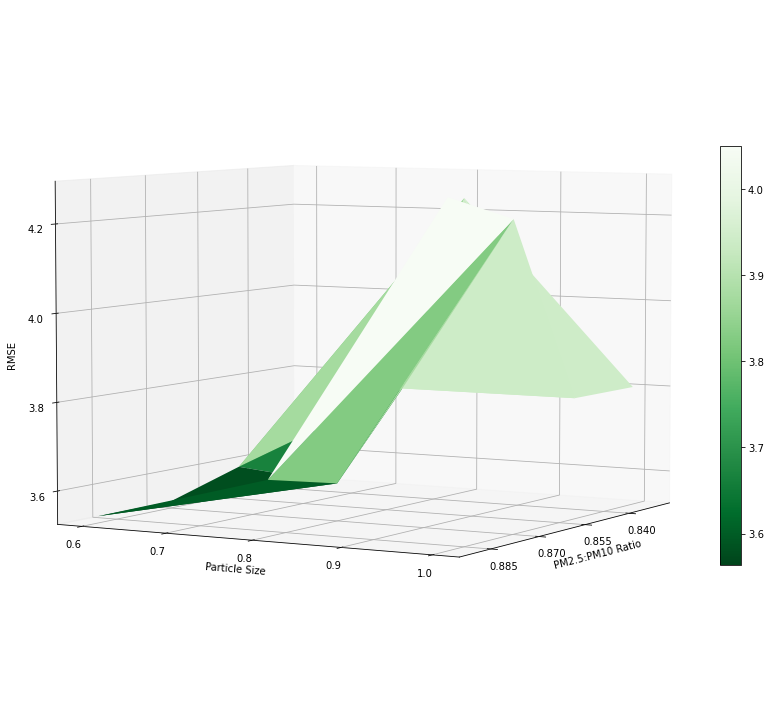

In [17]:
%matplotlib inline
# %matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

Xs = mean_array_test[:,0]
Ys = mean_array_test[:,1]
Zs = mean_array_test[:,2]


# ======
## plot:

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.Greens_r, linewidth=0)
fig.colorbar(surf1, shrink=0.6, pad=0.01)


#Dust Axes
ax.xaxis.set_major_locator(MaxNLocator(6)) #Sets number of ticks on axis
ax.set_xlabel('PM2.5:PM10 Ratio')
ax.yaxis.set_major_locator(MaxNLocator(5))  #Sets number of ticks on axis
ax.set_ylabel('Particle Size')
ax.zaxis.set_major_locator(MaxNLocator(4))  #Sets number of ticks on axis
ax.set_zlabel('RMSE', rotation=90)

ax.text(0.96, 6, 6, "Dust Models", color='black', fontsize=12,fontweight=500)


ax.view_init(5, 30) # controls orientation of 3D plot
fig.tight_layout()
fig.show() # or:
# fig.savefig('3D.png')

## Test 2 (Set 4)

Particle Size: [0.6, 0.6, 0.6, 0.6, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0]
Ratios: [0.83, 0.85, 0.87, 0.89, 0.83, 0.85, 0.87, 0.89, 0.83, 0.85, 0.87, 0.89]
Dust Hours: [1101, 1115, 1148, 1191, 841, 861, 909, 965, 711, 737, 797, 870]
Non-Dust Hours: [1638, 1624, 1591, 1548, 1898, 1878, 1830, 1774, 2028, 2002, 1942, 1869]
Dust NRMSE: [0.45, 0.45, 0.45, 0.45, 0.33, 0.34, 0.34, 0.33, 0.42, 0.41, 0.35, 0.34]
Non-Dust NRMSE: [0.45, 0.45, 0.45, 0.45, 0.33, 0.34, 0.34, 0.33, 0.42, 0.41, 0.35, 0.34]
Mean NRMSE: [0.45, 0.45, 0.45, 0.45, 0.33, 0.34, 0.34, 0.33, 0.42, 0.41, 0.35, 0.34]
Dust RMSE: [5.2, 5.15, 5.14, 5.05, 4.06, 4.08, 4.0, 3.86, 5.38, 5.11, 4.27, 4.07]
Non-Dust RMSE: [2.69, 2.7, 2.69, 2.66, 2.68, 2.67, 2.67, 2.64, 2.73, 2.73, 2.74, 2.69]
Mean RMSE: [3.94, 3.92, 3.92, 3.86, 3.37, 3.38, 3.34, 3.25, 4.06, 3.92, 3.5, 3.38]
Dust R2: [0.65, 0.66, 0.66, 0.67, 0.81, 0.8, 0.81, 0.82, 0.68, 0.71, 0.8, 0.81]
Non-Dust R2: [0.47, 0.47, 0.47, 0.47, 0.48, 0.49, 0.48, 0.48, 0.46, 0.46, 0.45, 0.45]


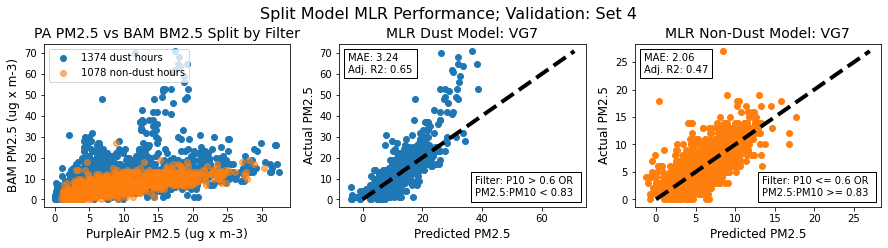

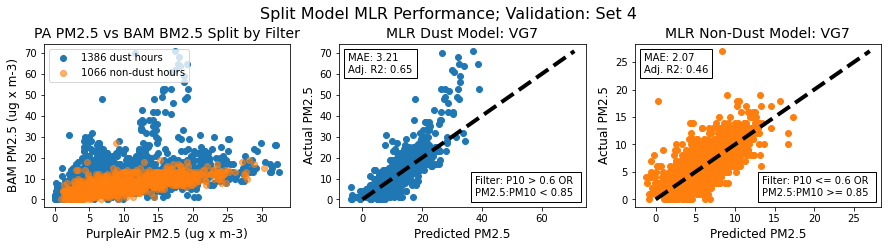

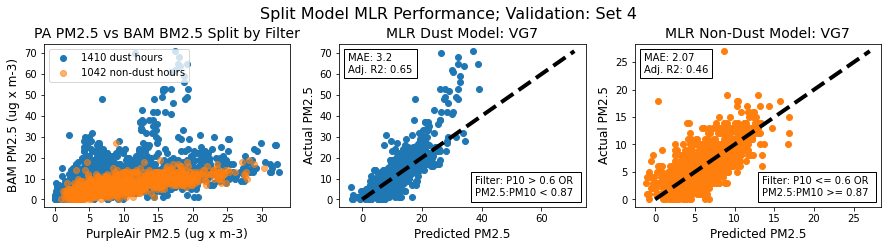

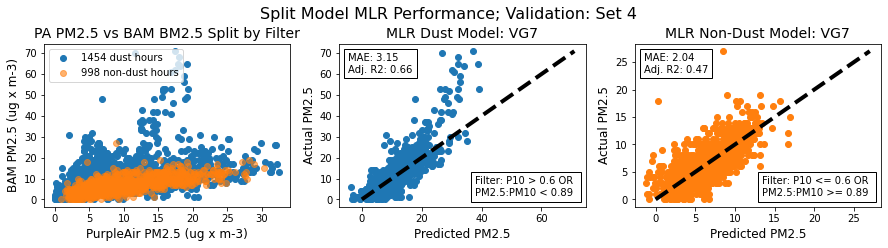

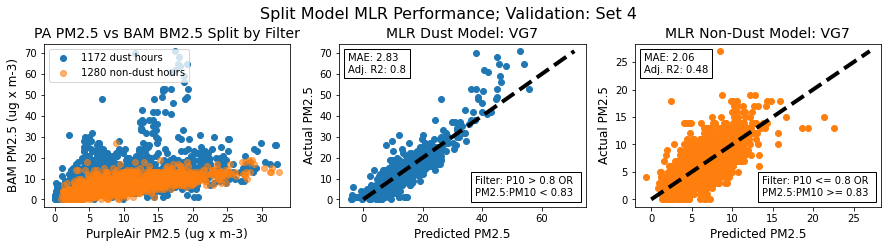

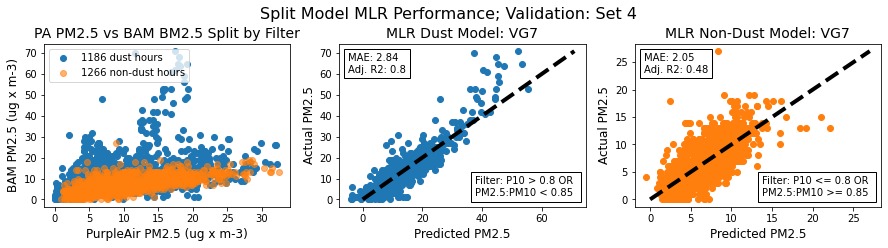

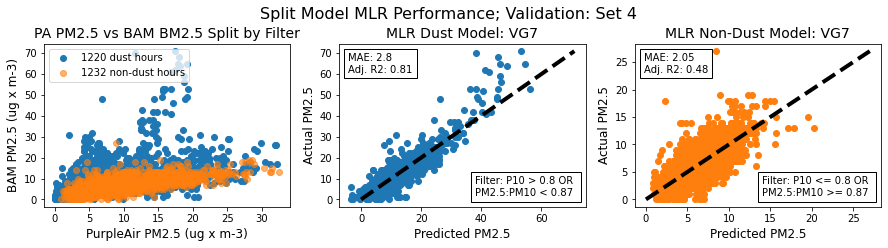

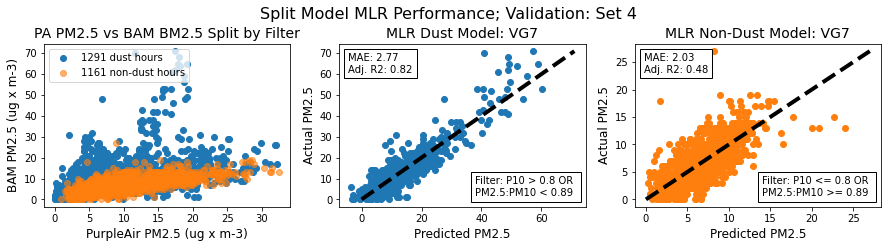

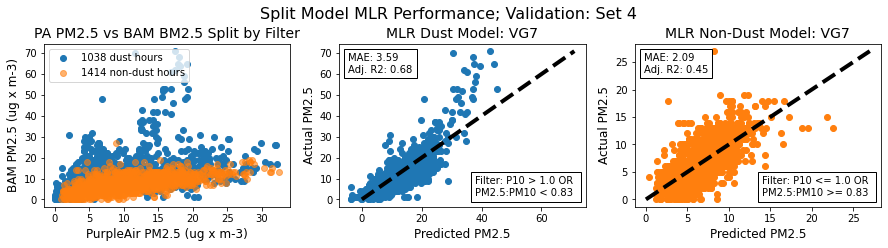

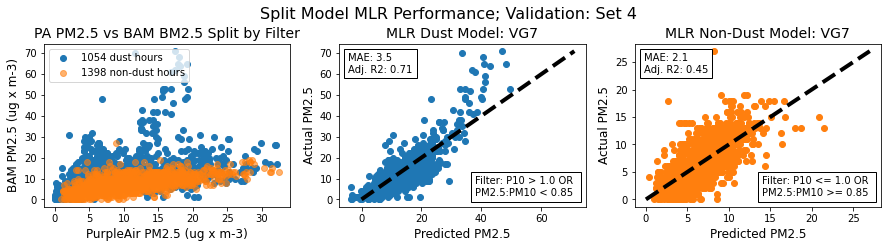

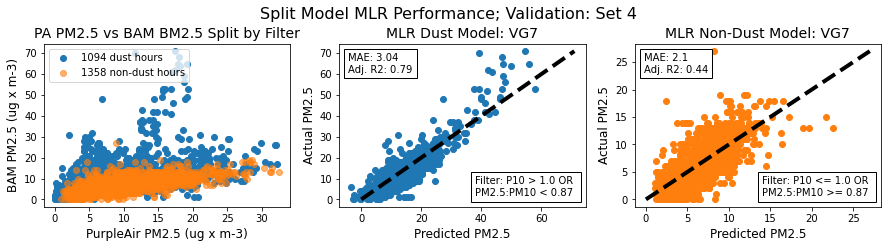

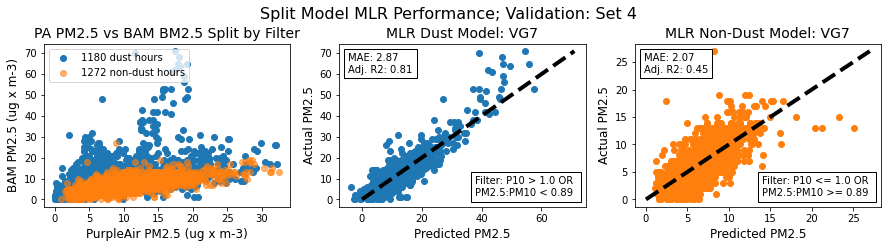

In [18]:
%%time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

################################## Edit each time change is made #####################################
particle_size_test2 = []
keys_ratio_test2 = []
dust_nrmse_ratio_test2 = []
nodust_nrmse_ratio_test2 = []
nrmse_mean_ratio_test2 = []
dust_rmse_ratio_test2 = []
nodust_rmse_ratio_test2 = []
rmse_mean_ratio_test2 = []
dust_hours_ratio_test2 = []
nodust_hours_ratio_test2 = []
r2_mean_test2 = []
dust_r2_test2 = []
nodust_r2_test2 = []
dust_mae_test2 = []
nodust_mae_test2 = []
mean_mae_test2 = []
dust_nmae_test2 = []
nodust_nmae_test2 = []
mean_nmae_test2 = []

################################## PA-PM2.5 Treshold ###########################################
# pm25 = 
for p_size in np.arange(start_,end_,increment_):
    for threshold in np.arange(start,end,increment):
#################################### Dust Filters #############################################

        df_dust = df[(df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold)]
        df_nodust = df[~((df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold))]

        df_dust_test2 = df_test2[(df_test2['p_10_0_um_avg'] > p_size) | (df_test2['pm25_pm10'] < threshold)]
        df_nodust_test2 = df_test2[~((df_test2['p_10_0_um_avg'] > p_size) | (df_test2['pm25_pm10'] < threshold))]

    ################################### Slice Datasets ##########################################################
    #################################### Training Set ##############################################################
        VG7 = df_dust[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y = df_dust['tceq_pm25']

        VG7_nd = df_nodust[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y_nd = df_nodust['tceq_pm25']

    #################################### Validation Set ##############################################################
        VG7_test2 = df_dust_test2[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y_test2 = df_dust_test2['tceq_pm25']

        VG7_nd_test2 = df_nodust_test2[['current_temp_f', 'current_humidity'
                       ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
                       , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                        ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                        ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

        Y_nd_test2 = df_nodust_test2['tceq_pm25']

    ############################### Train & Save Models #################################################
        trained_model = model_formula.fit(VG7, Y)
        # Save to file in the current working directory
        pkl_filename = r'{}\trained_model.pkl'.format(computer)
        with open(pkl_filename, 'wb') as file:
            pickle.dump(trained_model, file)

        trained_model_nd = model_formula.fit(VG7_nd, Y_nd)
        # Save to file in the current working directory
        pkl_filename_nd = r'{}\trained_model_nd.pkl'.format(computer)
        with open(pkl_filename_nd, 'wb') as file:
            pickle.dump(trained_model_nd, file)

    ############################# Make Figure ###########################################
        fig = plt.figure(figsize=(15,3))
        ax = fig.add_subplot(132)
        ax2 = fig.add_subplot(133)
        ax3 = fig.add_subplot(131)
        fig.suptitle('Split Model ' + model_type + ' Performance; Validation: ' + test2, y=1.05, size=suptitle_size)

        #Plot 131
        ax3.scatter(df_dust_test2['pm2_5_atm_avg'], df_dust_test2['tceq_pm25'], label = str(df_dust_test2.shape[0])+' dust hours', c=color)
        ax3.scatter(df_nodust_test2['pm2_5_atm_avg'], df_nodust_test2['tceq_pm25'], label = str(df_nodust_test2.shape[0])+' non-dust hours', alpha=0.6, c=color_nd)
        ax3.set_ylabel('BAM PM2.5 (ug x m-3)', size=label_size)
        ax3.set_xlabel('PurpleAir PM2.5 (ug x m-3)', size=label_size)
        ax3.set_title("PA PM2.5 vs BAM BM2.5 Split by Filter", size=title_size)#(str(model_type) + ' Split-Model: VG7')
        ax3.legend(loc=2)   

    ###################################### Dust #############################################
        # Load from file
        with open(pkl_filename, 'rb') as file:
            pickle_model = pickle.load(file)

        #Metrics
        predicted = cross_val_predict(pickle_model, VG7_test2, Y_test2)
        squared_error = (predicted - Y_test2)**2
        sum_squared_error = sum(squared_error)
        predicted_mean = predicted.mean()
        squared_total = (Y_test2 - predicted_mean)**2
        sum_squared_total = sum(squared_total)
        sum_squared_total
        n = Y_test2.shape[0]
        k = VG7_test2.shape[1]

        #Score
        rmse = np.sqrt(sum_squared_error/n)
        RMSE = round(rmse,2)
        Y_mean = Y_test2.mean()
        NRMSE = round(RMSE/Y_mean,2)
        r2 = 1 - (sum_squared_error/sum_squared_total)
        R2 = round(r2,2)
        ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
        AR2 = round(ar2,2) 
        MAE = round(sum(abs(predicted - Y_test2))/n,2)
        nMAE = round((sum(abs(predicted - Y_test2)))/n/Y_mean,2)

        #Plot 132
        ax.scatter(predicted, Y_test2, c=color)
        ax.plot([Y_test2.min(), Y_test2.max()], [Y_test2.min(), Y_test2.max()], 'k--', lw=4)
        ax.set_xlabel('Predicted PM2.5', size=label_size)
        ax.set_ylabel('Actual PM2.5', size=label_size)
        ax.set_title(str(model_type) + ' Dust Model: VG7',size=title_size)
        anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n'
                                     'Adj. R2: ' + str(AR2), loc=2)
        ax.add_artist(anchored_text)
        anchored_text2 = AnchoredText('Filter: P10 > ' + str(round(p_size,2)) + 
          ' OR ' + '\n' + 'PM2.5:PM10 < '+ str(round(threshold,2)), loc=4)
        ax.add_artist(anchored_text2)

    ##################################### No Dust ####################################
        # Load from file
        with open(pkl_filename_nd, 'rb') as file:
            pickle_model_nd = pickle.load(file)


        #Metrics
        predicted_nd = cross_val_predict(pickle_model_nd, VG7_nd_test2, Y_nd_test2)
        squared_error_nd = (predicted_nd - Y_nd_test2)**2
        sum_squared_error_nd = sum(squared_error_nd)
        predicted_mean_nd = predicted_nd.mean()
        squared_total_nd = (Y_nd_test2 - predicted_mean_nd)**2
        sum_squared_total_nd = sum(squared_total_nd)
        n_nd = Y_nd_test2.shape[0]
        k_nd = VG7_nd_test2.shape[1]

        #Score
        rmse_nd = np.sqrt(sum_squared_error_nd/n_nd)
        RMSE_nd = round(rmse_nd,2)
        Y_mean_nd = Y_nd_test2.mean()
        NRMSE_nd = round(RMSE/Y_mean,2)
        r2_nd = 1 - (sum_squared_error_nd/sum_squared_total_nd)
        R2_nd = round(r2_nd,2)
        ar2_nd = 1-(((1-r2_nd)*(n_nd-1))/(n_nd-k_nd-1))
        AR2_nd = round(ar2_nd,2)
        MAE_nd = round(sum(abs(predicted_nd - Y_nd_test2))/n_nd,2)
        nMAE_nd = round((sum(abs(predicted_nd - Y_nd_test2)))/n_nd/Y_mean_nd,2)

        #Plot 133
        ax2.scatter(predicted_nd, Y_nd_test2, c=color_nd)# edgecolors=(0, 0, 0))
        ax2.plot([Y_nd_test2.min(), Y_nd_test2.max()], [Y_nd_test2.min(), Y_nd_test2.max()], 'k--', lw=4)
        ax2.set_xlabel('Predicted PM2.5', size=label_size)
        ax2.set_ylabel('Actual PM2.5', size = label_size)
        ax2.set_title(str(model_type) + ' Non-Dust Model: VG7', size=title_size)
        anchored_text = AnchoredText('MAE: ' + str(MAE_nd) + '\n'
                                     'Adj. R2: ' + str(AR2_nd), loc=2)
        ax2.add_artist(anchored_text)
        anchored_text2 = AnchoredText('Filter: P10 <= ' + str(round(p_size,2)) + 
                  ' OR ' + '\n' + 'PM2.5:PM10 >= '+ str(round(threshold,2)), loc=4)
        ax2.add_artist(anchored_text2)

    ################################## Edit each time change is made ###########################################
        particle_size_test2.append(round(p_size,2))
        keys_ratio_test2.append(round(threshold,2))
        dust_hours_ratio_test2.append(df_dust.shape[0])
        nodust_hours_ratio_test2.append(df_nodust.shape[0])

        dust_nrmse_ratio_test2.append(NRMSE)
        nodust_nrmse_ratio_test2.append(NRMSE_nd)
        nrmse_mean_ratio_test2.append(round((NRMSE+NRMSE_nd)/2,2))

        dust_rmse_ratio_test2.append(RMSE)
        nodust_rmse_ratio_test2.append(RMSE_nd)
        rmse_mean_ratio_test2.append(round((RMSE+RMSE_nd)/2,2))
        
        dust_r2_test2.append(R2)
        nodust_r2_test2.append(R2_nd)
        r2_mean_test2.append(round((R2+R2_nd)/2,2))
        
        dust_nmae_test2.append(nMAE)
        nodust_nmae_test2.append(nMAE_nd)
        mean_nmae_test2.append(round((nMAE+nMAE_nd)/2,2))

        dust_mae_test2.append(MAE)
        nodust_mae_test2.append(MAE_nd)
        mean_mae_test2.append(round((MAE+MAE_nd)/2,2))

    ################################## Edit each time change is made ###########################################
print('Particle Size:', particle_size_test2)
print('Ratios:', keys_ratio_test2)
print('Dust Hours:', dust_hours_ratio_test2)
print('Non-Dust Hours:', nodust_hours_ratio_test2)

print('Dust NRMSE:', dust_nrmse_ratio_test2)
print('Non-Dust NRMSE:', nodust_nrmse_ratio_test2)
print('Mean NRMSE:', nrmse_mean_ratio_test2)

print('Dust RMSE:', dust_rmse_ratio_test2)
print('Non-Dust RMSE:', nodust_rmse_ratio_test2)
print('Mean RMSE:', rmse_mean_ratio_test2)

print('Dust R2:', dust_r2_test2)
print('Non-Dust R2:', nodust_r2_test2)
print('Mean R2:', r2_mean_test2)

print('Dust NRMSE:', dust_mae_test2)
print('Non-Dust NRMSE:', nodust_mae_test2)
print('Mean NRMSE:', mean_mae_test2)

print('Dust NRMSE:', dust_nmae_test2)
print('Non-Dust NRMSE:', nodust_nmae_test2)
print('Mean NRMSE:', mean_nmae_test2)
    ################################## Edit each time change is made ###########################################

In [19]:
# df_nodust.to_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\outlier2.csv')

In [20]:
dftest2 = pd.DataFrame(
    {'Particle Size': particle_size_test2,
    'Ratios':  keys_ratio_test2,
    'Dust Hours': dust_hours_ratio_test2,
    'Non-Dust Hours':nodust_hours_ratio_test2,

    'Dust NRMSE': dust_nrmse_ratio_test2,
    'Non-Dust NRMSE': nodust_nrmse_ratio_test2,
    'Mean NRMSE': nrmse_mean_ratio_test2,

    'Dust RMSE': dust_rmse_ratio_test2,
    'Non-Dust RMSE': nodust_rmse_ratio_test2,
    'Mean RMSE': rmse_mean_ratio_test2,
     
    'Dust R2': dust_r2_test2,
    'Non-Dust R2': nodust_r2_test2,
    'Mean R2': r2_mean_test2
     
    })

df_meanrmse_test2 = dftest2[['Ratios', 'Particle Size', 'Mean RMSE']]
df_meanr2_test2 = dftest2[['Ratios', 'Particle Size', 'Mean R2']]


mean_array_test2 = df_meanrmse_test2.to_numpy()
meanr2_array_test2 = df_meanr2_test2.to_numpy()


In [21]:
df_test2.shape

(2452, 17)

In [22]:
dftest2_Filter = dftest2[dftest2['Non-Dust Hours']>1200]
dftest2_Filter.sort_values(by=['Mean RMSE'], ascending=True).head(20)

,Particle Size,Ratios,Dust Hours,Non-Dust Hours,Dust NRMSE,Non-Dust NRMSE,Mean NRMSE,Dust RMSE,Non-Dust RMSE,Mean RMSE,Dust R2,Non-Dust R2,Mean R2
7,0.8,0.89,965,1774,0.33,0.33,0.33,3.86,2.64,3.25,0.82,0.48,0.65
6,0.8,0.87,909,1830,0.34,0.34,0.34,4.00,2.67,3.34,0.81,0.48,0.65
4,0.8,0.83,841,1898,0.33,0.33,0.33,4.06,2.68,3.37,0.81,0.48,0.65
5,0.8,0.85,861,1878,0.34,0.34,0.34,4.08,2.67,3.38,0.80,0.49,0.65
11,1.0,0.89,870,1869,0.34,0.34,0.34,4.07,2.69,3.38,0.81,0.45,0.63
10,1.0,0.87,797,1942,0.35,0.35,0.35,4.27,2.74,3.50,0.80,0.45,0.62
3,0.6,0.89,1191,1548,0.45,0.45,0.45,5.05,2.66,3.86,0.67,0.47,0.57
1,0.6,0.85,1115,1624,0.45,0.45,0.45,5.15,2.70,3.92,0.66,0.47,0.56
2,0.6,0.87,1148,1591,0.45,0.45,0.45,5.14,2.69,3.92,0.66,0.47,0.56
9,1.0,0.85,737,2002,0.41,0.41,0.41,5.11,2.73,3.92,0.71,0.46,0.58


In [23]:
dftest2_Filter.sort_values(by=['Mean R2'], ascending=False).head(20)

,Particle Size,Ratios,Dust Hours,Non-Dust Hours,Dust NRMSE,Non-Dust NRMSE,Mean NRMSE,Dust RMSE,Non-Dust RMSE,Mean RMSE,Dust R2,Non-Dust R2,Mean R2
4,0.8,0.83,841,1898,0.33,0.33,0.33,4.06,2.68,3.37,0.81,0.48,0.65
5,0.8,0.85,861,1878,0.34,0.34,0.34,4.08,2.67,3.38,0.80,0.49,0.65
6,0.8,0.87,909,1830,0.34,0.34,0.34,4.00,2.67,3.34,0.81,0.48,0.65
7,0.8,0.89,965,1774,0.33,0.33,0.33,3.86,2.64,3.25,0.82,0.48,0.65
11,1.0,0.89,870,1869,0.34,0.34,0.34,4.07,2.69,3.38,0.81,0.45,0.63
10,1.0,0.87,797,1942,0.35,0.35,0.35,4.27,2.74,3.50,0.80,0.45,0.62
9,1.0,0.85,737,2002,0.41,0.41,0.41,5.11,2.73,3.92,0.71,0.46,0.58
3,0.6,0.89,1191,1548,0.45,0.45,0.45,5.05,2.66,3.86,0.67,0.47,0.57
8,1.0,0.83,711,2028,0.42,0.42,0.42,5.38,2.73,4.06,0.68,0.46,0.57
0,0.6,0.83,1101,1638,0.45,0.45,0.45,5.20,2.69,3.94,0.65,0.47,0.56


## R2 Test 2

In [24]:
# %matplotlib inline
%matplotlib 

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

Xs = meanr2_array_test2[:,0]
Ys = meanr2_array_test2[:,1]
Zs = meanr2_array_test2[:,2]


# ======
## plot:

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.Greens, linewidth=0)
fig.colorbar(surf1, shrink=0.6, pad=0.01)


#Dust Axes
ax.xaxis.set_major_locator(MaxNLocator(6)) #Sets number of ticks on axis
ax.set_xlabel('PM2.5:PM10 Ratio')
ax.yaxis.set_major_locator(MaxNLocator(8))  #Sets number of ticks on axis
ax.set_ylabel('Particle Size')
ax.zaxis.set_major_locator(MaxNLocator(4))  #Sets number of ticks on axis
ax.set_zlabel('RMSE', rotation=90)

ax.text(0.96, 6, 6, "Dust Models", color='black', fontsize=12,fontweight=500)


ax.view_init(5, 30) # controls orientation of 3D plot
fig.tight_layout()
fig.show() # or:
# fig.savefig('3D.png')

Using matplotlib backend: Qt5Agg


## RMSE Test 2

In [25]:
%matplotlib 
# %matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

Xs = mean_array_test2[:,0]
Ys = mean_array_test2[:,1]
Zs = mean_array_test2[:,2]

# ======
## plot:

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_trisurf(Xs, Ys, Zs, cmap=cm.Greens_r, linewidth=0)
fig.colorbar(surf1, shrink=0.6, pad=0.01)


#Dust Axes
ax.xaxis.set_major_locator(MaxNLocator(6)) #Sets number of ticks on axis
ax.set_xlabel('PM2.5:PM10 Ratio')
ax.yaxis.set_major_locator(MaxNLocator(5))  #Sets number of ticks on axis
ax.set_ylabel('Particle Size')
ax.zaxis.set_major_locator(MaxNLocator(4))  #Sets number of ticks on axis
ax.set_zlabel('RMSE', rotation=90)

ax.text(0.96, 6, 6, "Dust Models", color='black', fontsize=12,fontweight=500)


ax.view_init(5, 30) # controls orientation of 3D plot
fig.tight_layout()
fig.show() # or:
# fig.savefig('3D.png')

Using matplotlib backend: Qt5Agg


## 2D Averages Plots

In [26]:
nrmse_sets = np.array([nrmse_mean_ratio_val, nrmse_mean_ratio_test, nrmse_mean_ratio_test2])
nrmse_mean_sets = np.average(nrmse_sets, axis=0)

rmse_sets = np.array([rmse_mean_ratio_val, rmse_mean_ratio_test, rmse_mean_ratio_test2])
rmse_mean_sets = np.average(rmse_sets, axis=0)

r2_sets = np.array([r2_mean_val, r2_mean_test, r2_mean_test2])
r2_mean_sets = np.average(r2_sets, axis=0)

nmae_sets = np.array([mean_nmae_val, mean_nmae_test, mean_nmae_test2])
nmae_mean_sets = np.average(nmae_sets, axis=0)

mae_sets = np.array([mean_mae_val, mean_mae_test, mean_mae_test2])
mae_mean_sets = np.average(mae_sets, axis=0)

Text(0.5, 0.92, 'Mean NMAE of Dust and Non-Dust MLR Models Across Thresholds -- Training: Set 1; Validation: Set 2, Set 3 and Set 4')

<Figure size 864x576 with 0 Axes>

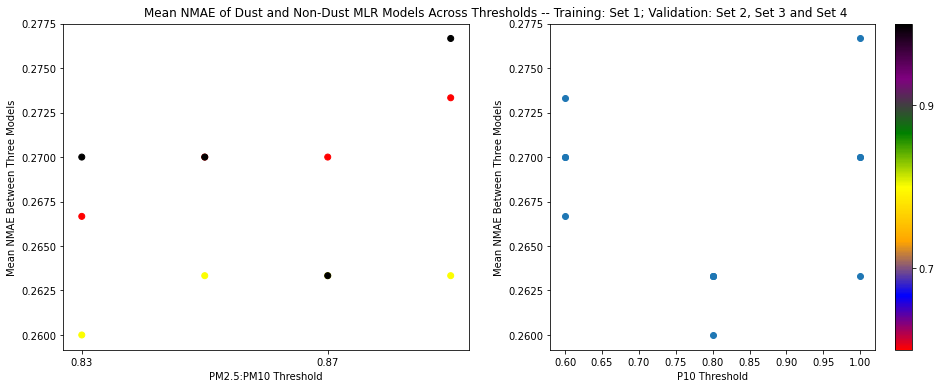

In [27]:
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(12,8))

cmap = LinearSegmentedColormap.from_list('name', ['red', 'blue', 'orange', 'yellow', 'green', 'purple', 'black'])
#### Plot ######
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

color = ax.scatter(keys_ratio_test[:], nmae_mean_sets[:], marker='o',label = 'Mean of 2 sets',
                   c=particle_size_val, cmap = cmap)
ax.set_xticks(np.arange(min(keys_ratio_test), max(keys_ratio_test)+0.01, 0.04))
ax.set_xlabel('PM2.5:PM10 Threshold')
ax.set_ylabel('Mean NMAE Between Three Models')
cbar = fig.colorbar(color, ticks=[0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

ax2.scatter(particle_size_val[:], nmae_mean_sets[:], marker='o',label = 'Mean of 2 sets')
ax2.set_xlabel('P10 Threshold')
ax2.set_ylabel('Mean NMAE Between Three Models')

plt.suptitle('Mean NMAE of Dust and Non-Dust ' + model_type + ' Models Across Thresholds --' +' Training: ' + training + '; Validation: ' + val +', '+ test + ' and ' + test2, y=0.92)
# plt.legend()


<Figure size 864x576 with 0 Axes>

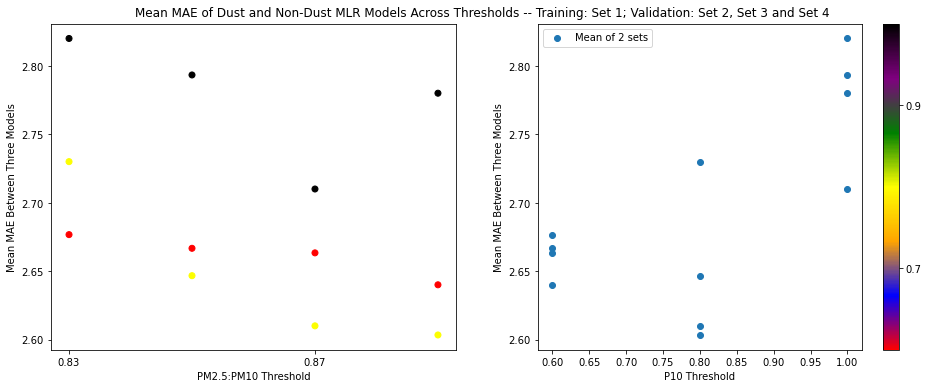

In [28]:
%matplotlib inline
plt.figure(figsize=(12,8))

    
cmap = LinearSegmentedColormap.from_list('name', ['red', 'blue', 'orange', 'yellow', 'green', 'purple', 'black'])

#### Plot ######
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

color = ax.scatter(keys_ratio_test[:], mae_mean_sets[:], marker='o',label = 'Mean of 2 sets',
                   c=particle_size_val, cmap = cmap)
ax.set_xticks(np.arange(min(keys_ratio_test), max(keys_ratio_test)+0.01, 0.04))
ax.set_xlabel('PM2.5:PM10 Threshold')
ax.set_ylabel('Mean MAE Between Three Models')
cbar = fig.colorbar(color, ticks=[0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])


ax2.scatter(particle_size_val[:], mae_mean_sets[:], marker='o',label = 'Mean of 2 sets')
# ax2.set_xticks(np.arange(min(x), max(x)+0.6, 0.2))
ax2.set_xlabel('P10 Threshold')
ax2.set_ylabel('Mean MAE Between Three Models')

plt.suptitle('Mean MAE of Dust and Non-Dust ' + model_type + ' Models Across Thresholds --' +' Training: ' + training + '; Validation: ' + val +', '+ test + ' and ' + test2, y=0.92)
plt.legend()


<Figure size 864x576 with 0 Axes>

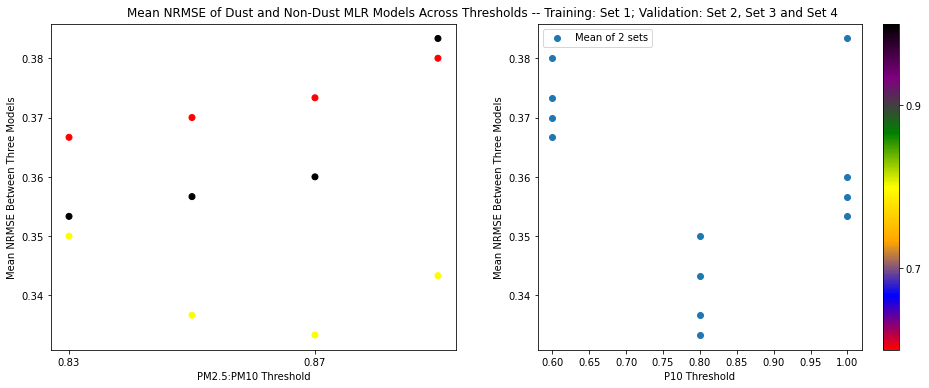

In [29]:
%matplotlib inline
plt.figure(figsize=(12,8))

    
#### Plot ######
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

color = ax.scatter(keys_ratio_test[:], nrmse_mean_sets[:], marker='o',label = 'Mean of 2 sets',
                  c = particle_size_val, cmap=cmap)
ax.set_xticks(np.arange(min(keys_ratio_test), max(keys_ratio_test)+0.01, 0.04))
ax.set_xlabel('PM2.5:PM10 Threshold')
ax.set_ylabel('Mean NRMSE Between Three Models')
cbar = fig.colorbar(color, ticks=[0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

ax2.scatter(particle_size_val[:], nrmse_mean_sets[:], marker='o',label = 'Mean of 2 sets')
# ax2.set_xticks(np.arange(min(x), max(x)+0.6, 0.2))
ax2.set_xlabel('P10 Threshold')
ax2.set_ylabel('Mean NRMSE Between Three Models')

plt.suptitle('Mean NRMSE of Dust and Non-Dust ' + model_type + ' Models Across Thresholds --' +' Training: ' + training + '; Validation: ' + val +', '+ test + ' and ' + test2, y=0.92)
plt.legend()


<Figure size 864x576 with 0 Axes>

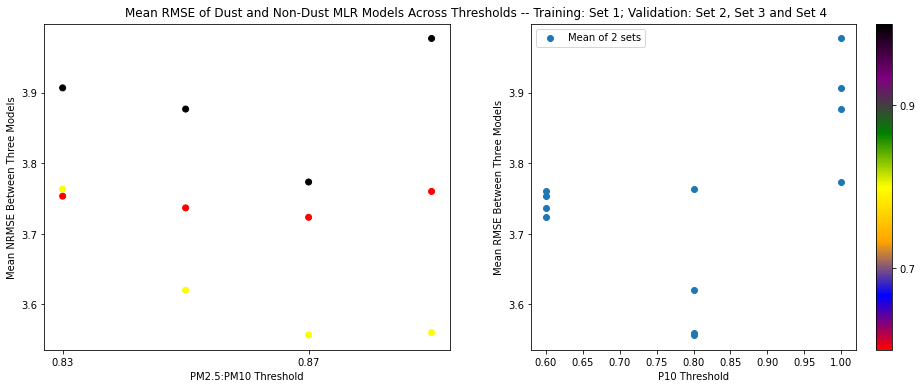

In [30]:
%matplotlib inline
plt.figure(figsize=(12,8))

    
#### Plot ######
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

color = ax.scatter(keys_ratio_test[:], rmse_mean_sets[:], marker='o',label = 'Mean of 2 sets',
                  c = particle_size_val, cmap=cmap)
ax.set_xticks(np.arange(min(keys_ratio_test), max(keys_ratio_test)+0.01, 0.04))
ax.set_xlabel('PM2.5:PM10 Threshold')
ax.set_ylabel('Mean NRMSE Between Three Models')
cbar = fig.colorbar(color, ticks=[0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

ax2.scatter(particle_size_val[:], rmse_mean_sets[:], marker='o',label = 'Mean of 2 sets')
# ax2.set_xticks(np.arange(min(x), max(x)+0.6, 0.2))
ax2.set_xlabel('P10 Threshold')
ax2.set_ylabel('Mean RMSE Between Three Models')

plt.suptitle('Mean RMSE of Dust and Non-Dust ' + model_type + ' Models Across Thresholds --' +' Training: ' + training + '; Validation: ' + val +', '+ test + ' and ' + test2, y=0.92)
plt.legend()


Text(0.5, 0.92, 'Mean R2 of Dust and Non-Dust MLR Models Across Thresholds -- Training: Set 1; Validation: Set 2, Set 3 and Set 4')

<Figure size 864x576 with 0 Axes>

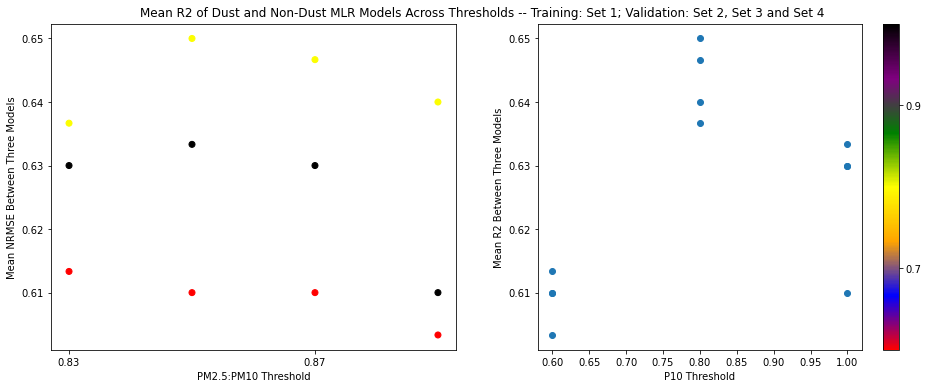

In [31]:
%matplotlib inline
plt.figure(figsize=(12,8))

    
#### Plot ######
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

color = ax.scatter(keys_ratio_test[:], r2_mean_sets[:], marker='o',label = 'Mean of 2 sets',
                  c = particle_size_val, cmap=cmap)
ax.set_xticks(np.arange(min(keys_ratio_test), max(keys_ratio_test)+0.01, 0.04))
ax.set_xlabel('PM2.5:PM10 Threshold')
ax.set_ylabel('Mean NRMSE Between Three Models')
cbar = fig.colorbar(color, ticks=[0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

ax2.scatter(particle_size_val[:], r2_mean_sets[:], marker='o',label = 'Mean of 2 sets')
# ax2.set_xticks(np.arange(min(x), max(x)+0.6, 0.2))
ax2.set_xlabel('P10 Threshold')
ax2.set_ylabel('Mean R2 Between Three Models')

plt.suptitle('Mean R2 of Dust and Non-Dust ' + model_type + ' Models Across Thresholds --' +' Training: ' + training + '; Validation: ' + val +', '+ test + ' and ' + test2, y=0.92)
# plt.legend()


In [32]:
# print('NRMSE --','Training:', str(training), 'Validation:', str(val), nrmse_mean_ratio_val)
# print('NRMSE --','Training:', str(training), 'Validation:', str(test), nrmse_mean_ratio_test)
print('RMSE --','Training:', str(training), 'Validation:', str(val), rmse_mean_ratio_val)
print('RMSE --','Training:', str(training), 'Validation:', str(test), rmse_mean_ratio_test)
print('RMSE --','Training:', str(training), 'Validation:', str(test2), rmse_mean_ratio_test2)
print('\n')
print('R2 --','Training:', str(training), 'Validation:', str(val), r2_mean_val)
print('R2 --','Training:', str(training), 'Validation:', str(test), r2_mean_test)
print('R2 --','Training:', str(training), 'Validation:', str(test2), r2_mean_test2)
print('\n')
# print('Dust NRMSE:','Training:', str(training), 'Validation:', str(val),dust_nrmse_ratio_val)
# print('Non-dust NRMSE:','Training:', str(training), 'Validation:', str(val),nodust_nrmse_ratio_val)
print('Dust RMSE:','Training:', str(training), 'Validation:', str(val),dust_rmse_ratio_val)
print('Non-dust RMSE:','Training:', str(training), 'Validation:', str(val),nodust_rmse_ratio_val)
print('\n')
# print('Dust NRMSE:','Training:', str(training), 'Validation:', str(test),dust_nrmse_ratio_test)
# print('Non-dust NRMSE:','Training:', str(training), 'Validation:', str(test),nodust_nrmse_ratio_test)
print('Dust RMSE:','Training:', str(training), 'Validation:', str(test),dust_rmse_ratio_test)
print('Non-dust RMSE:','Training:', str(training), 'Validation:', str(test),nodust_rmse_ratio_test)
print('\n')
print('Dust RMSE:','Training:', str(training), 'Validation:', str(test2),dust_rmse_ratio_test2)
print('Non-dust RMSE:','Training:', str(training), 'Validation:', str(test2),nodust_rmse_ratio_test2)


RMSE -- Training: Set 1 Validation: Set 2 [3.7, 3.7, 3.71, 3.88, 3.69, 3.68, 3.72, 3.78, 3.86, 3.91, 3.6, 4.27]
RMSE -- Training: Set 1 Validation: Set 3 [3.62, 3.59, 3.54, 3.54, 4.23, 3.8, 3.61, 3.65, 3.8, 3.8, 4.22, 4.28]
RMSE -- Training: Set 1 Validation: Set 4 [3.94, 3.92, 3.92, 3.86, 3.37, 3.38, 3.34, 3.25, 4.06, 3.92, 3.5, 3.38]


R2 -- Training: Set 1 Validation: Set 2 [0.63, 0.62, 0.62, 0.6, 0.66, 0.67, 0.65, 0.65, 0.69, 0.69, 0.69, 0.64]
R2 -- Training: Set 1 Validation: Set 3 [0.65, 0.65, 0.65, 0.64, 0.6, 0.63, 0.64, 0.62, 0.63, 0.63, 0.58, 0.56]
R2 -- Training: Set 1 Validation: Set 4 [0.56, 0.56, 0.56, 0.57, 0.65, 0.65, 0.65, 0.65, 0.57, 0.58, 0.62, 0.63]


Dust RMSE: Training: Set 1 Validation: Set 2 [4.52, 4.52, 4.52, 4.84, 4.28, 4.28, 4.35, 4.49, 4.54, 4.67, 4.03, 5.44]
Non-dust RMSE: Training: Set 1 Validation: Set 2 [2.87, 2.89, 2.9, 2.91, 3.1, 3.08, 3.09, 3.08, 3.17, 3.15, 3.16, 3.1]


Dust RMSE: Training: Set 1 Validation: Set 3 [4.47, 4.4, 4.31, 4.29, 5.56, 4.69, 4

In [33]:
with open('rmse_t1_v2.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(rmse_mean_ratio_val, filehandle)
    
with open('r2_t1_v2.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(r2_mean_val, filehandle)
    
with open('rmse_t1_v3.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(rmse_mean_ratio_test, filehandle)
    
with open('r2_t1_v3.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(r2_mean_test, filehandle)
    
with open('rmse_t1_v4.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(rmse_mean_ratio_test2, filehandle)
    
with open('r2_t1_v4.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(r2_mean_test2, filehandle)
    
with open('particle_sizes.data', 'wb') as filehandle:
# store the data as binary data stream
    pickle.dump(particle_size_val, filehandle)

with open('ratios.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(keys_ratio_val, filehandle)

Validation (Set 2)

In [34]:
with open('rmse_t1_v2.data', 'rb') as filehandle:
    # store the data as binary data stream
    rmse_t1_v2 = pickle.load(filehandle)
    
with open('r2_t1_v2.data', 'rb') as filehandle:
    # store the data as binary data stream
    r2_t1_v2 = pickle.load(filehandle)

Test 1 (Set 3)

In [35]:
with open('rmse_t1_v3.data', 'rb') as filehandle:
    # store the data as binary data stream
    rmse_t1_v3 = pickle.load(filehandle)

with open('r2_t1_v3.data', 'rb') as filehandle:
    # store the data as binary data stream
    r2_t1_v3 = pickle.load(filehandle)

Test 2 (Set 4)

In [36]:
with open('rmse_t1_v4.data', 'rb') as filehandle:
    # store the data as binary data stream
    rmse_t1_v4 = pickle.load(filehandle)

with open('r2_t1_v4.data', 'rb') as filehandle:
    # store the data as binary data stream
    r2_t1_v4 = pickle.load(filehandle)

Parameters

In [37]:
with open('particle_sizes.data', 'rb') as filehandle:
    # store the data as binary data stream
    particle_sizes = pickle.load(filehandle)

with open('ratios.data', 'rb') as filehandle:
    # store the data as binary data stream
    ratios = pickle.load(filehandle)

## Dust Averages

In [38]:
mae_dust_sets = np.array([dust_mae_val,
                            dust_mae_test,
                            dust_mae_test2])
mae_dust = np.average(mae_dust_sets, axis=0)

In [39]:
nmae_dust_sets = np.array([dust_nmae_val,
                            dust_nmae_test,
                            dust_nmae_test2])
nmae_dust = np.average(nmae_dust_sets, axis=0)

In [40]:
rmse_dust_sets = np.array([dust_rmse_ratio_val,
                            dust_rmse_ratio_test,
                            dust_rmse_ratio_test2])
rmse_dust = np.average(rmse_dust_sets, axis=0)

In [41]:
r2_dust_sets = np.array([dust_r2_val,
                    dust_r2_test,
                    dust_r2_test2])
r2_dust = np.average(r2_dust_sets, axis=0)

In [42]:
df_dust = pd.DataFrame(
    {'Particle Size': particle_sizes,
    'Ratios':  ratios,
     'R2':  r2_dust,
     'RMSE': rmse_dust,
     'MAE': mae_dust
    })

df_dustr2 = df_dust[['Ratios', 'Particle Size', 'R2']]
dustr2_array = df_dustr2.to_numpy()

df_dustmae = df_dust[['Ratios', 'Particle Size', 'MAE']]
dustmae_array = df_dustmae.to_numpy()

## Non-Dust Averages

In [43]:
mae_nodust_sets = np.array([nodust_mae_val,
                            nodust_mae_test,
                            nodust_mae_test2])
mae_nodust = np.average(mae_nodust_sets, axis=0)

In [44]:
rmse_nodust_sets = np.array([nodust_rmse_ratio_val,
                            nodust_rmse_ratio_test,
                            nodust_rmse_ratio_test2])
rmse_nodust = np.average(rmse_nodust_sets, axis=0)

In [45]:
r2_nodust_sets = np.array([nodust_r2_val,
                    nodust_r2_test,
                    nodust_r2_test2])
r2_nodust = np.average(r2_nodust_sets, axis=0)

In [46]:
df_nodust = pd.DataFrame(
    {'Particle Size': particle_sizes,
    'Ratios':  ratios,
     'R2':  r2_nodust,
     'MAE': mae_nodust
    })

df_nodustr2 = df_nodust[['Ratios', 'Particle Size', 'R2']]
nodustr2_array = df_nodustr2.to_numpy()

df_nodustmae = df_nodust[['Ratios', 'Particle Size', 'MAE']]
nodustmae_array = df_nodustmae.to_numpy()

## Ranks

In [47]:
df1 = df_dust.sort_values(by=['MAE'], ascending=True).reset_index(drop=True)
df1.index.names = ['Rank1']
df1 = df1.reset_index()
# df1.to_csv(r'{}\dust_mae2_rank.csv')

In [48]:
df2 = df_dust.sort_values(by=['R2'], ascending=False).reset_index(drop=True)
df2.index.names = ['Rank2']
df2 = df2.reset_index()
# df2.to_csv(r'{}\dust_r22_rank.csv')

In [49]:
df3 = df_nodust.sort_values(by=['MAE'], ascending=True).reset_index(drop=True)
df3.index.names = ['Rank3']
df3 = df3.reset_index()
# df3.to_csv(r'{}\nodust_mae2_rank.csv')

In [50]:
df4 =  df_nodust.sort_values(by=['R2'], ascending=False).reset_index(drop=True)
df4.index.names = ['Rank4']
df4 = df4.reset_index()
# df4.to_csv(r'{}\nodust_r22_rank.csv')

In [51]:
merge1 = pd.merge(df1, df2, on = ['Particle Size', 'Ratios'], how = 'outer')
merge2 = pd.merge(merge1, df3, on = ['Particle Size', 'Ratios'], how = 'outer')
merge3 = pd.merge(merge2, df4, on = ['Particle Size', 'Ratios'], how = 'outer')
merge3

,Rank1,Particle Size,Ratios,R2_x,RMSE_x,MAE_x,Rank2,R2_y,RMSE_y,MAE_y,Rank3,R2_x,MAE_x,Rank4,R2_y,MAE_y
0,0,0.8,0.89,0.823333,4.250000,3.013333,1,0.823333,4.250000,3.013333,5,0.456667,2.196667,8,0.456667,2.196667
1,1,0.8,0.87,0.826667,4.233333,3.020000,0,0.826667,4.233333,3.020000,4,0.463333,2.196667,5,0.463333,2.196667
2,2,0.8,0.85,0.820000,4.350000,3.090000,2,0.820000,4.350000,3.090000,6,0.473333,2.206667,0,0.473333,2.206667
3,3,1.0,0.87,0.810000,4.546667,3.130000,3,0.810000,4.546667,3.130000,10,0.456667,2.290000,9,0.456667,2.290000
4,4,0.6,0.89,0.756667,4.726667,3.156667,11,0.756667,4.726667,3.156667,1,0.453333,2.130000,11,0.453333,2.130000
5,5,0.6,0.87,0.763333,4.656667,3.193333,9,0.763333,4.656667,3.193333,3,0.460000,2.136667,7,0.460000,2.136667
6,6,0.6,0.85,0.763333,4.690000,3.206667,8,0.763333,4.690000,3.206667,2,0.463333,2.133333,6,0.463333,2.133333
7,7,0.6,0.83,0.756667,4.730000,3.223333,10,0.756667,4.730000,3.223333,0,0.466667,2.126667,4,0.466667,2.126667
8,8,0.8,0.83,0.800000,4.633333,3.243333,4,0.800000,4.633333,3.243333,7,0.470000,2.213333,1,0.470000,2.213333
9,9,1.0,0.89,0.766667,4.990000,3.293333,7,0.766667,4.990000,3.293333,8,0.453333,2.270000,10,0.453333,2.270000


In [52]:
df5 = merge3[['Particle Size', 'Ratios', 'Rank1', 'Rank2', 'Rank3', 'Rank4']]
df5['Sum of Ranks'] = df5['Rank1'] + df5['Rank2'] + df5['Rank3'] + df5['Rank4'] 
df5.columns = ['P10 Count', 'PM2.5:PM10 Ratio', 'Dust MAE', 'Dust R2', 'Non-Dust MAE', 'Non-Dust R2', 'Sum of Ranks']
# df5.sort_values(by=['Non-Dust MAE'], ascending=True)
df5['Sum MAE'] =  df5['Dust MAE'] + df5['Non-Dust MAE']
# df5.sort_values(by=['Sum MAE'], ascending=True).head(30)

## Select Variables that Minimize Sum of Ranks

In [53]:
df5.sort_values(by=['Sum of Ranks'], ascending=True).head(30)

,P10 Count,PM2.5:PM10 Ratio,Dust MAE,Dust R2,Non-Dust MAE,Non-Dust R2,Sum of Ranks,Sum MAE
1,0.8,0.87,1,0,4,5,10,5
2,0.8,0.85,2,2,6,0,10,8
0,0.8,0.89,0,1,5,8,14,5
8,0.8,0.83,8,4,7,1,20,15
7,0.6,0.83,7,10,0,4,21,7
6,0.6,0.85,6,8,2,6,22,8
5,0.6,0.87,5,9,3,7,24,8
3,1.0,0.87,3,3,10,9,25,13
4,0.6,0.89,4,11,1,11,27,5
10,1.0,0.85,10,5,9,3,27,19


In [54]:
# dust_val = df_dust_val[['tceq_pm25', 'pm2_5_atm_avg']]
# dust_val.mean()

In [55]:
# nodust_val = df_nodust_val[['tceq_pm25', 'pm2_5_atm_avg']]
# nodust_val.mean()

In [56]:
# dust = df_dust[['tceq_pm25', 'pm2_5_atm_avg']]
# dust.mean()


In [57]:
# nodust = df_nodust[['tceq_pm25', 'pm2_5_atm_avg']]
# nodust.mean()

In [58]:
# 10.6/8.8

In [59]:
# df['tceq_pm25'].mean()